# Question 1

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [9]:
train = pd.read_csv(r'C:\Users\ADMIN\Downloads\termdeposit_train.csv')
test = pd.read_csv(r'C:\Users\ADMIN\Downloads\termdeposit_test.csv')

In [11]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [13]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [19]:
train.shape

(31647, 18)

In [21]:
test.shape

(13564, 17)

In [23]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [25]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [27]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [29]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [32]:
train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

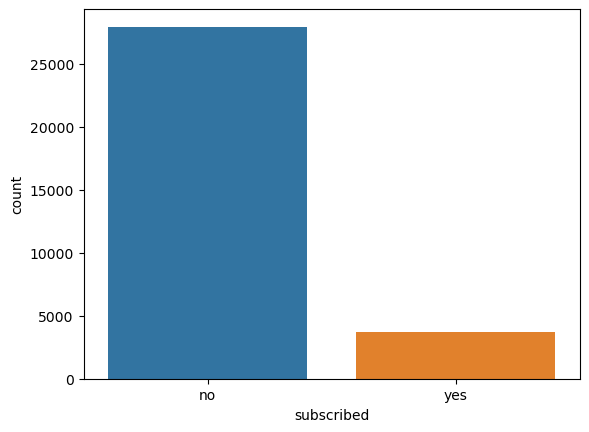

In [34]:
sns.countplot(data=train, x='subscribed')

In [36]:
train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

In [38]:
train['job'].value_counts()

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

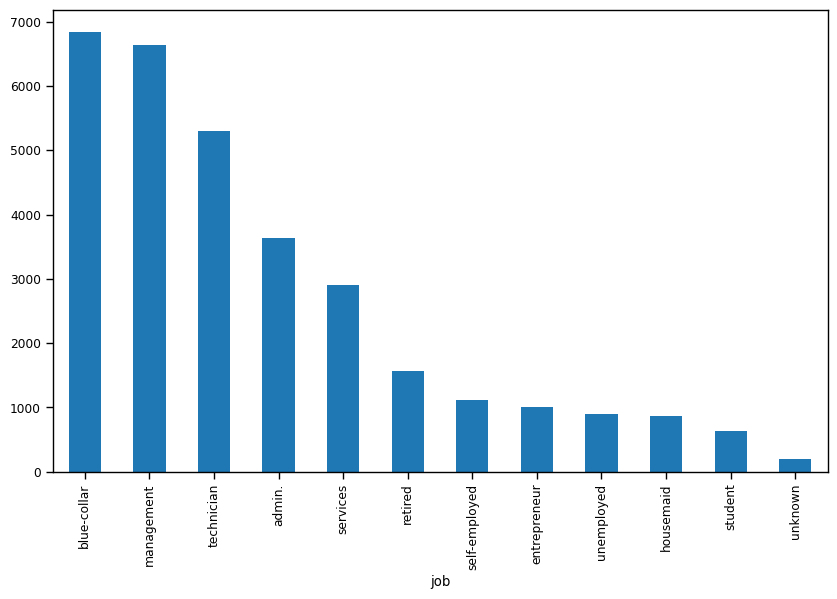

In [42]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [44]:
train['marital'].value_counts()

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

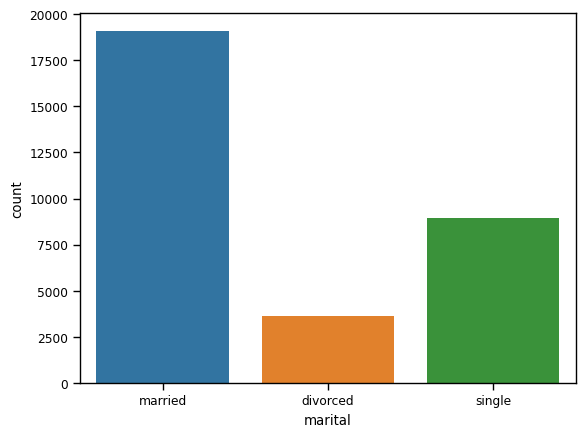

In [46]:
sns.countplot(data=train, x='marital');

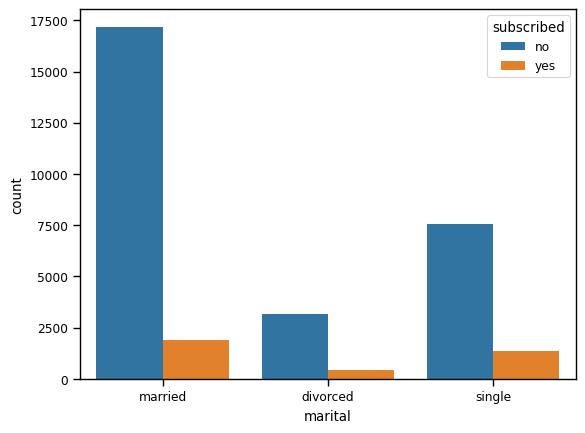

In [48]:
sns.countplot(data=train, x='marital', hue='subscribed');

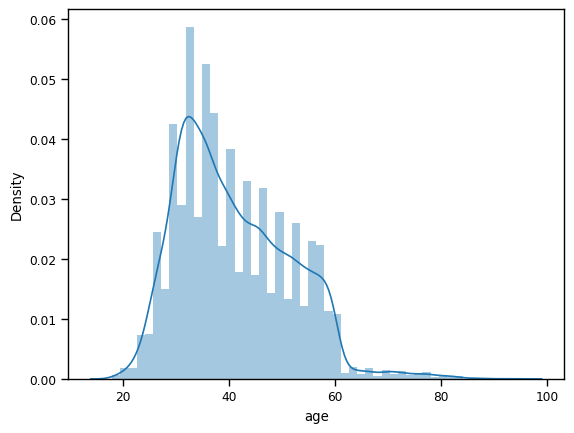

In [50]:
sns.distplot(train['age']);

In [54]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [56]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)


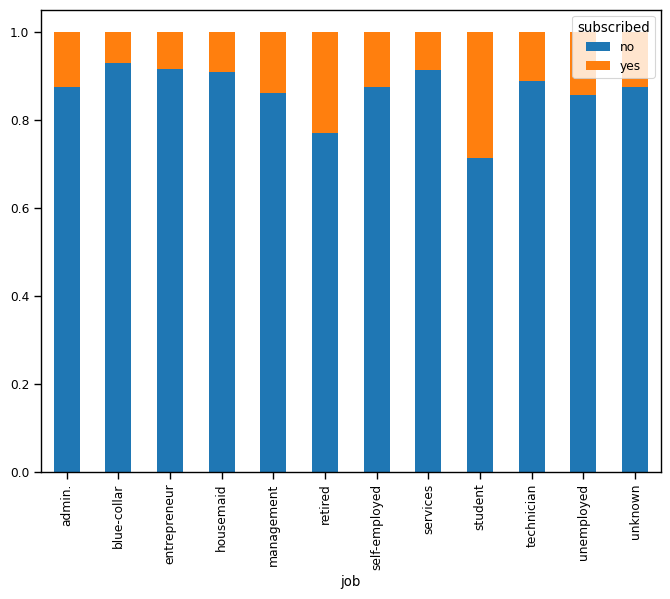

In [58]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

In [60]:
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [62]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


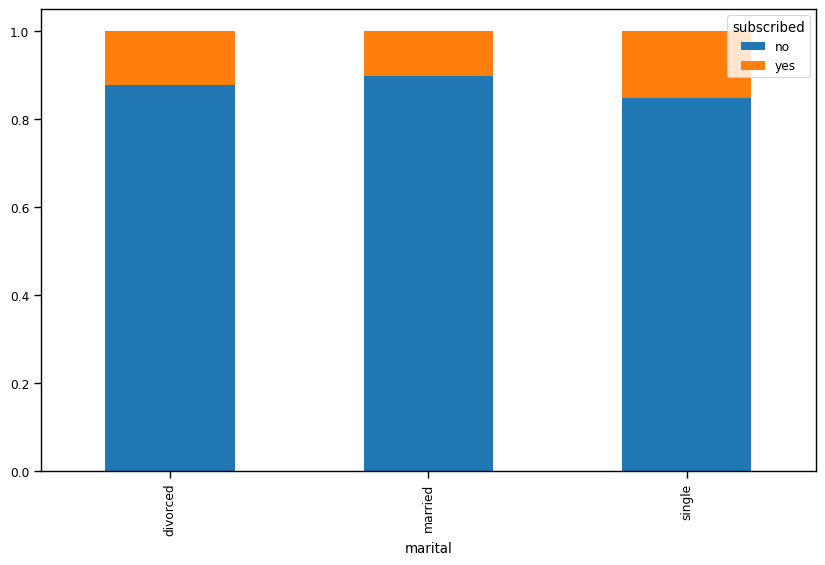

In [64]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

In [66]:
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [68]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

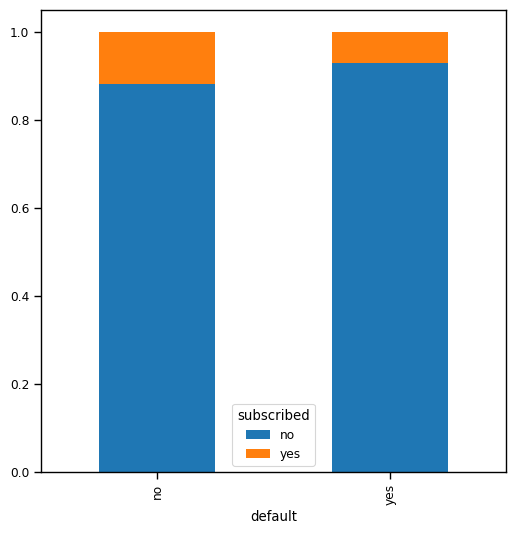

In [70]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

In [100]:
train['subscribed'].replace({'no': 0, 'yes': 1}, inplace=True)


KeyError: 'subscribed'

In [102]:
train['subscribed'].head()

KeyError: 'subscribed'

In [108]:
tc = train.corr()
tc

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.018790,-0.121656,...,-0.208083,0.114475,-0.238047,0.118076,0.178456,0.180922,0.329756,0.209052,0.265963,-0.496277
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,-0.055530,-0.046797,...,0.048587,0.022598,-0.128285,0.036428,0.058387,0.040462,-0.005755,-0.015908,0.029112,-0.000885
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,-0.030051,-0.051048,...,0.035545,0.025238,-0.069464,0.116274,0.040273,0.013423,0.011361,0.009141,0.028584,-0.027209
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.012114,-0.017137,...,-0.196153,-0.024551,-0.020473,0.095541,0.031461,-0.052942,-0.064980,-0.027566,-0.028971,0.079794
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,-0.012764,0.008423,...,-0.016949,-0.008491,0.007397,-0.008458,0.013256,0.015145,-0.016621,-0.002115,0.036574,-0.002768
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.019145,0.011835,...,0.048353,-0.019126,-0.066412,-0.084276,-0.050919,-0.038044,-0.087085,-0.020246,-0.057645,0.107196
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.032793,0.014206,...,-0.114253,0.037521,0.075042,0.012283,0.056424,0.072536,0.698224,0.393408,0.229305,-0.868844
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.016241,-0.017275,...,-0.059557,0.023289,0.002417,0.038587,0.049107,0.061083,0.327826,0.297019,0.189952,-0.504232
job_admin.,0.018790,-0.055530,-0.030051,-0.012114,-0.012764,-0.019145,0.032793,0.016241,1.000000,-0.189074,...,-0.007028,0.008401,0.027257,-0.011660,0.011989,0.004348,0.019712,0.015165,0.016726,-0.031425
job_blue-collar,-0.121656,-0.046797,-0.051048,-0.017137,0.008423,0.011835,0.014206,-0.017275,-0.189074,1.000000,...,0.015663,-0.043016,0.171407,-0.049513,-0.043012,-0.041842,-0.002455,-0.002122,-0.053518,0.028174


<Axes: >

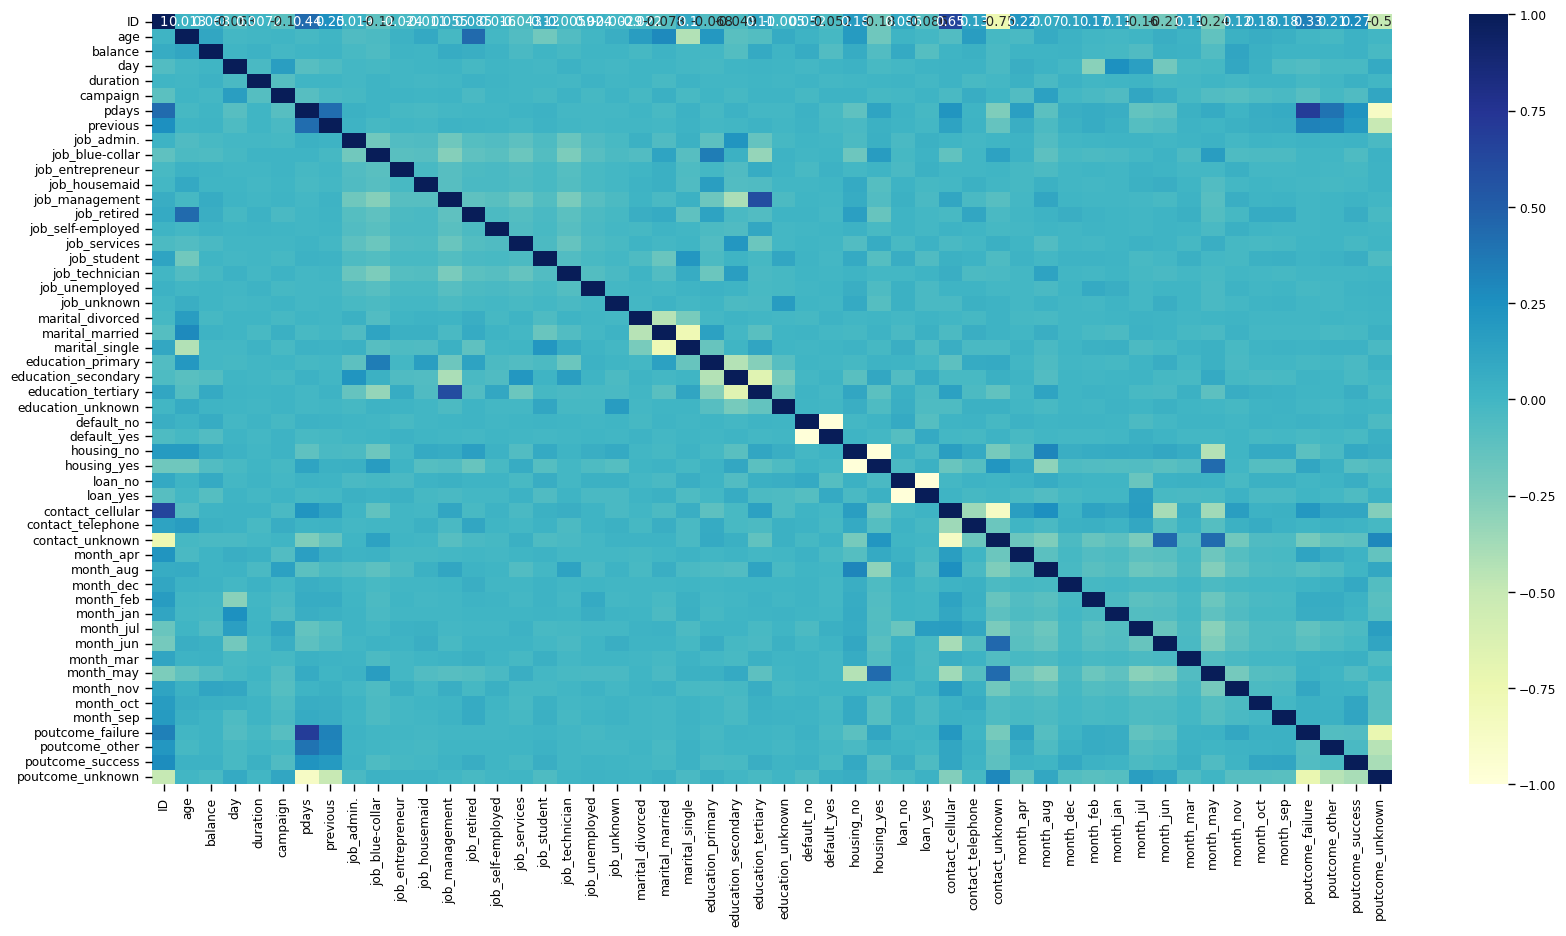

In [110]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

In [112]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

KeyError: 'subscribed'

In [114]:
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,True,False,...,False,False,False,True,False,False,False,False,False,True
1,40576,31,3,20,91,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15320,27,891,18,240,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,43962,57,3287,22,867,1,84,3,False,False,...,True,False,False,False,False,False,False,False,True,False
4,29842,31,119,4,380,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True


In [116]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [120]:
lreg = LogisticRegression()

In [122]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [124]:
pred = lreg.predict(X_val)

In [138]:
accuracy_score(y_val,pred)

0.891785150078989

In [142]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [144]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [146]:
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [148]:
accuracy_score(y_val,predict)

0.9042654028436019

In [150]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
1,40403,78,2787,1,372,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3709,31,144,16,676,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,37422,57,3777,13,65,2,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,12527,45,-705,3,111,1,-1,0,False,True,...,False,False,False,False,False,False,False,False,False,True


In [152]:
test_pred = clf.predict(test)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [154]:
submissions = pd.DataFrame()

In [156]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [158]:
submissions['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [160]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [162]:
submissions['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [164]:
submissions.to_csv('submission file.csv', header=True, index=False)

# Question 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
from scipy import stats
import feature_engine
import webbrowser
import joblib
import re
import warnings
warnings.filterwarnings('ignore')
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer, RandomSampleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [8]:
train_df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Data_Train.csv')
test_df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Data_Test.csv')

In [10]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [12]:
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [14]:
train_df.shape,test_df.shape

((12690, 9), (4231, 8))

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [18]:
train_df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [20]:
test_df.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


In [22]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [24]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [26]:
df.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
16917,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN
16920,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes,NaN


In [28]:
train_df.isna().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [30]:
test_df.isna().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [32]:
numeric_cols = train_df.select_dtypes(include='number').columns
df_numeric1 = train_df[numeric_cols]
df_numeric1.corr()

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


In [34]:
numeric_cols = test_df.select_dtypes(include='number').columns
df_numeric2 = test_df[numeric_cols]
df_numeric2.corr()

,RESTAURANT_ID
RESTAURANT_ID,1.0


In [36]:
num_var = df.select_dtypes(include=['number']).columns.tolist()
cat_var = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [38]:
num_var,len(num_var)

(['RESTAURANT_ID', 'COST'], 2)

In [39]:
cat_var,len(cat_var)

(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES'], 7)

In [40]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [44]:
def show_all_rows(x):
    pd.set_option('display.max_rows',None)
    i = 0
    while i == 0:
        print(x)
        i = 1
    pd.reset_option('display.max_rows')

In [46]:
df.TITLE.value_counts()

TITLE
QUICK BITES                 5634
CASUAL DINING               4910
CAFÉ                         830
DESSERT PARLOR               508
CASUAL DINING,BAR            463
                            ... 
QUICK BITES,BAR                1
BEVERAGE SHOP,FOOD COURT       1
MEAT SHOP                      1
BAKERY,CONFECTIONERY           1
BHOJANALYA                     1
Name: count, Length: 122, dtype: int64

In [48]:
df.TITLE.unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', nan, 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR',
 

In [50]:
len(df.TITLE.unique())

123

In [52]:
show_all_rows(df.TITLE.value_counts())

TITLE
QUICK BITES                     5634
CASUAL DINING                   4910
CAFÉ                             830
DESSERT PARLOR                   508
CASUAL DINING,BAR                463
FINE DINING                      406
BAKERY                           392
BEVERAGE SHOP                    216
BAR,CASUAL DINING                175
LOUNGE                           136
BAKERY,QUICK BITES               126
BAR                              124
FOOD COURT                       110
KIOSK                             73
SWEET SHOP,QUICK BITES            70
MESS                              68
SWEET SHOP                        67
PUB                               67
CASUAL DINING,CAFÉ                65
DHABA                             61
BAKERY,DESSERT PARLOR             61
DESSERT PARLOR,QUICK BITES        57
QUICK BITES,SWEET SHOP            49
CAFÉ,CASUAL DINING                47
BEVERAGE SHOP,QUICK BITES         45
CAFÉ,BAKERY                       43
PUB,CASUAL DINING               

In [54]:
df_clean = df.dropna(subset=['TITLE'])
dining_title = df_clean[df_clean.TITLE.str.contains('DINING')].TITLE.value_counts().index

In [56]:
dining_title

Index(['CASUAL DINING', 'CASUAL DINING,BAR', 'FINE DINING',
       'BAR,CASUAL DINING', 'CASUAL DINING,CAFÉ', 'CAFÉ,CASUAL DINING',
       'PUB,CASUAL DINING', 'MICROBREWERY,CASUAL DINING', 'FINE DINING,BAR',
       'LOUNGE,CASUAL DINING', 'CASUAL DINING,PUB', 'CASUAL DINING,LOUNGE',
       'FINE DINING,LOUNGE', 'CASUAL DINING,MICROBREWERY',
       'CASUAL DINING,BAKERY', 'CASUAL DINING,SWEET SHOP', 'BAR,FINE DINING',
       'QUICK BITES,CASUAL DINING', 'COCKTAIL BAR,CASUAL DINING',
       'CASUAL DINING,IRANI CAFE', 'FINE DINING,CAFÉ', 'CASUAL DINING,CLUB',
       'LOUNGE,FINE DINING', 'CLUB,CASUAL DINING', 'CASUAL DINING,FOOD COURT',
       'SWEET SHOP,CASUAL DINING', 'CASUAL DINING,DESSERT PARLOR',
       'CAFÉ,FINE DINING', 'BAKERY,CASUAL DINING', 'PUB,FINE DINING',
       'FINE DINING,MICROBREWERY', 'CLUB,FINE DINING',
       'BEVERAGE SHOP,CASUAL DINING'],
      dtype='object', name='TITLE')

In [58]:
df_cleaned = df.copy()

In [60]:
df_cleaned.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [62]:
df_cleaned.TITLE.replace(to_replace=dining_title,value='CASUAL DINING',inplace=True)

In [64]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING                6333
QUICK BITES                  5634
CAFÉ                          830
DESSERT PARLOR                508
BAKERY                        392
                             ... 
CONFECTIONERY,QUICK BITES       1
MICROBREWERY,LOUNGE             1
DESSERT PARLOR,PAAN SHOP        1
BAKERY,CONFECTIONERY            1
BHOJANALYA                      1
Name: count, Length: 90, dtype: int64

In [66]:
df_cleaned = df_cleaned.dropna(subset=['TITLE'])
filtered_df = df_cleaned[df_cleaned.TITLE.str.contains('BITES')]

In [68]:
quick_bites_title = df_cleaned[df_cleaned.TITLE.str.contains('BITES')].TITLE.value_counts().index

In [70]:
quick_bites_title

Index(['QUICK BITES', 'BAKERY,QUICK BITES', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,QUICK BITES', 'QUICK BITES,SWEET SHOP',
       'BEVERAGE SHOP,QUICK BITES', 'QUICK BITES,DESSERT PARLOR',
       'CAFÉ,QUICK BITES', 'QUICK BITES,BAKERY', 'QUICK BITES,BEVERAGE SHOP',
       'FOOD COURT,QUICK BITES', 'QUICK BITES,FOOD COURT', 'QUICK BITES,CAFÉ',
       'QUICK BITES,KIOSK', 'MEAT SHOP,QUICK BITES', 'KIOSK,QUICK BITES',
       'QUICK BITES,BAR', 'QUICK BITES,FOOD TRUCK',
       'CONFECTIONERY,QUICK BITES', 'QUICK BITES,MEAT SHOP'],
      dtype='object', name='TITLE')

In [72]:
len(quick_bites_title)

20

In [74]:
df_cleaned.TITLE.replace(to_replace=quick_bites_title,value='QUICK BITES',inplace=True)

In [76]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING               6333
QUICK BITES                 6139
CAFÉ                         830
DESSERT PARLOR               508
BAKERY                       392
                            ... 
BAKERY,FOOD COURT              1
SWEET SHOP,CONFECTIONERY       1
BAKERY,CONFECTIONERY           1
BEVERAGE SHOP,FOOD COURT       1
BHOJANALYA                     1
Name: count, Length: 71, dtype: int64

In [78]:
df_cleaned[df_cleaned.TITLE.str.contains('CAF')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600.0
24,CAFÉ,2389,"Cafe, Italian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,4.2,493 votes,700.0
31,CAFÉ,2802,"Cafe, Tea","8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)",Gurgaon,DLF Cyber City,4.0,546 votes,500.0
32,CAFÉ,7836,"Cafe, Continental, European, American, Healthy...",10am – 12midnight (Mon-Sun),Andheri West,Versova,4.0,2228 votes,1200.0
37,CAFÉ,4455,"Cafe, Healthy Food",8:30am – 11pm (Mon-Sun),Bangalore,MG Road,4.3,69 votes,800.0
...,...,...,...,...,...,...,...,...,...
16817,CAFÉ,6653,"Cafe, Continental, Italian, Salad",11am – 11pm (Mon-Sun),New Delhi,Shahpur Jat,4.1,1114 votes,NaN
16866,CAFÉ,1499,"Cafe, Italian, Continental",11:30am – 11:30pm (Mon-Sun),Bangalore,Sahakara Nagar,3.9,241 votes,NaN
16873,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,NaN,NaN
16877,CAFÉ,2561,Cafe,11am – 11pm (Mon-Sun),Bangalore,Jalahalli,3.9,104 votes,NaN


In [80]:
df_cleaned[df_cleaned.TITLE.str.contains('CAF')].TITLE.value_counts()

TITLE
CAFÉ                   830
CAFÉ,BAKERY             43
CAFÉ,DESSERT PARLOR     38
CAFÉ,BAR                23
BAKERY,CAFÉ             18
DESSERT PARLOR,CAFÉ     12
BAR,CAFÉ                 4
BEVERAGE SHOP,CAFÉ       4
CAFÉ,BEVERAGE SHOP       4
LOUNGE,CAFÉ              2
PUB,CAFÉ                 2
CAFÉ,LOUNGE              2
IRANI CAFE,BAKERY        1
CAFÉ,FOOD COURT          1
Name: count, dtype: int64

In [82]:
cafe_title = df_cleaned[df_cleaned.TITLE.str.contains('CAF')].TITLE.value_counts().index

In [84]:
cafe_title

Index(['CAFÉ', 'CAFÉ,BAKERY', 'CAFÉ,DESSERT PARLOR', 'CAFÉ,BAR', 'BAKERY,CAFÉ',
       'DESSERT PARLOR,CAFÉ', 'BAR,CAFÉ', 'BEVERAGE SHOP,CAFÉ',
       'CAFÉ,BEVERAGE SHOP', 'LOUNGE,CAFÉ', 'PUB,CAFÉ', 'CAFÉ,LOUNGE',
       'IRANI CAFE,BAKERY', 'CAFÉ,FOOD COURT'],
      dtype='object', name='TITLE')

In [86]:
len(cafe_title)

14

In [88]:
df_cleaned.TITLE.replace(to_replace=cafe_title,value='CAFE',inplace=True)

In [90]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING                   6333
QUICK BITES                     6139
CAFE                             984
DESSERT PARLOR                   508
BAKERY                           392
BEVERAGE SHOP                    216
LOUNGE                           136
BAR                              124
FOOD COURT                       110
KIOSK                             73
MESS                              68
PUB                               67
SWEET SHOP                        67
BAKERY,DESSERT PARLOR             61
DHABA                             61
FOOD TRUCK                        37
LOUNGE,BAR                        27
CLUB                              26
BEVERAGE SHOP,DESSERT PARLOR      25
PUB,MICROBREWERY                  21
DESSERT PARLOR,BAKERY             17
BAR,LOUNGE                        17
DESSERT PARLOR,BEVERAGE SHOP      13
MICROBREWERY                      12
DESSERT PARLOR,SWEET SHOP         11
MICROBREWERY,PUB                   9
BAR,PUB                         

In [92]:
df_cleaned[df_cleaned.TITLE.str.contains('DESSERT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
49,DESSERT PARLOR,3378,"Ice Cream, Desserts","11am – 11pm (Mon, Tue, Wed, Thu, Sun), 11am –...",Bangalore,Whitefield,4.3,518 votes,400.0
64,"BEVERAGE SHOP,DESSERT PARLOR",8750,"Beverages, Desserts",12noon – 12:30AM (Mon-Sun),Mumbai,Mazgaon,3.7,69 votes,300.0
75,"DESSERT PARLOR,SWEET SHOP",8155,"Desserts, Mithai",8:30am – 10pm (Mon-Sun),Hyderabad,Dilsukhnagar,3.5,101 votes,200.0
82,"BAKERY,DESSERT PARLOR",5684,"Bakery, Desserts, Healthy Food",10am – 8pm (Mon-Sun),Bandra West,Pali Hill,4.0,545 votes,500.0
...,...,...,...,...,...,...,...,...,...
16732,DESSERT PARLOR,13914,"Ice Cream, Desserts",11am – 11pm (Mon-Sun),Kochi,Marine Drive,3.4,9 votes,NaN
16804,DESSERT PARLOR,9479,Ice Cream,10am – 11pm (Mon-Sun),Hyderabad,Saroor Nagar,3.6,69 votes,NaN
16856,DESSERT PARLOR,5113,"Ice Cream, Beverages",12noon – 12midnight (Mon-Sun),Gurgaon,DLF Phase 4,4.0,349 votes,NaN
16867,DESSERT PARLOR,5425,Desserts,10:30am – 12:30AM (Mon-Sun),Opposite Ellora Building,Off Carter Road,4.2,1236 votes,NaN


In [94]:
dessert_title = df_cleaned[df_cleaned.TITLE.str.contains('DESSERT')].TITLE.value_counts().index

In [96]:
dessert_title

Index(['DESSERT PARLOR', 'BAKERY,DESSERT PARLOR',
       'BEVERAGE SHOP,DESSERT PARLOR', 'DESSERT PARLOR,BAKERY',
       'DESSERT PARLOR,BEVERAGE SHOP', 'DESSERT PARLOR,SWEET SHOP',
       'DESSERT PARLOR,FOOD COURT', 'SWEET SHOP,DESSERT PARLOR',
       'FOOD COURT,DESSERT PARLOR', 'DESSERT PARLOR,PAAN SHOP',
       'DESSERT PARLOR,KIOSK', 'FOOD TRUCK,DESSERT PARLOR'],
      dtype='object', name='TITLE')

In [98]:
len(dessert_title)

12

In [100]:
df_cleaned.TITLE.replace(to_replace=dessert_title,value='DESSERT PARLOUR',inplace=True)

In [102]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING               6333
QUICK BITES                 6139
CAFE                         984
DESSERT PARLOUR              651
BAKERY                       392
BEVERAGE SHOP                216
LOUNGE                       136
BAR                          124
FOOD COURT                   110
KIOSK                         73
MESS                          68
PUB                           67
SWEET SHOP                    67
DHABA                         61
FOOD TRUCK                    37
LOUNGE,BAR                    27
CLUB                          26
PUB,MICROBREWERY              21
BAR,LOUNGE                    17
MICROBREWERY                  12
MICROBREWERY,PUB               9
BAR,PUB                        8
PUB,BAR                        7
PUB,LOUNGE                     5
PAAN SHOP                      5
MICROBREWERY,BAR               4
COCKTAIL BAR                   3
CLUB,BAR                       3
CONFECTIONERY                  3
LOUNGE,CLUB                    3
LOUN

<Axes: xlabel='TITLE', ylabel='COST'>

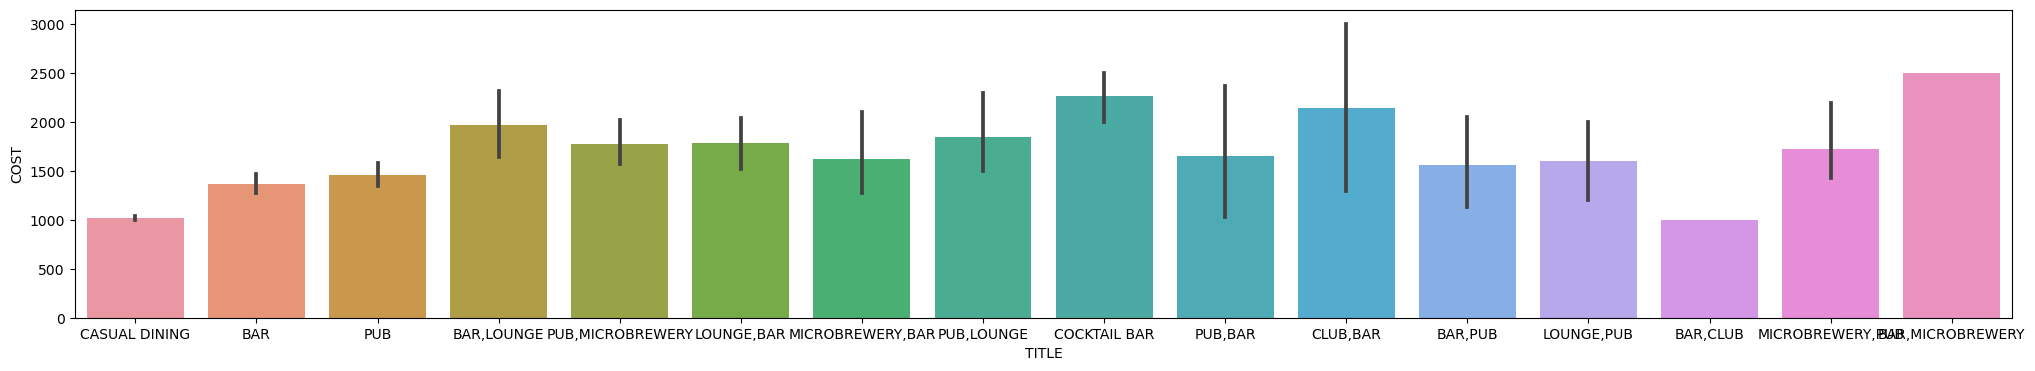

In [104]:
def fig_of_size(x,y):
    return plt.figure(figsize=(x,y))

fig_of_size(25,4)
sns.barplot(x='TITLE',y='COST',data=df_cleaned[df_cleaned.TITLE.str.contains('PUB|BAR|CASUAL DINING')])

In [105]:
df_cleaned[df_cleaned.TITLE.str.contains('CASUAL DINING')]['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'Biryani, Chinese, Mughlai, North Indian, Hyderabadi',
       'European, Mediterranean, Italian, Sushi', 'Sindhi, Street Food'],
      dtype=object)

In [106]:
df_cleaned[df_cleaned.TITLE.str.contains('BAR')]['CUISINES'].unique()

array(['Finger Food, North Indian, Continental, Italian',
       'North Indian, Chinese', 'Italian, Continental, Chinese, American',
       'North Indian, Chinese, Andhra',
       'Finger Food, American, Asian, Italian', 'Finger Food',
       'North Indian, Continental, Italian',
       'Continental, Finger Food, South Indian, North Indian, Chinese, Beverages',
       'Finger Food, Asian, Beverages, Chinese, Continental, Italian, North Indian',
       'American, North Indian, Pizza, Finger Food, Continental, Italian',
       'American, Italian, Mexican, Continental',
       'Chinese, Continental, Finger Food, North Indian, Italian, Mexican, ,',
       'Continental, North Indian, Chinese',
       'North Indian, South Indian, Chinese, Continental',
       'Continental, Chinese', 'Finger Food, Seafood', 'Continental',
       'Continental, South Indian, North Indian, Chinese, Finger Food',
       'Finger Food, Salad, Drinks Only, Steak',
       'American, Mexican, Italian', 'Bar Food, Nort

In [107]:
df_cleaned[df_cleaned.TITLE.str.contains('PUB')]['CUISINES'].unique()

array(['Finger Food, Continental, Asian, North Indian',
       'Finger Food, North Indian',
       'Continental, Chinese, Asian, Italian, Pizza',
       'Russian, Continental, North Indian', 'Bar Food, North Indian',
       'Finger Food',
       'Finger Food, Continental, Mexican, Burger, American, Desserts,',
       'Finger Food, Continental', 'North Indian, Chinese, Continental',
       'Asian, Continental, European',
       'Continental, Burger, Italian, Pizza, North Indian, Salad',
       'Continental, Italian, North Indian, Finger Food, German',
       'Chinese, South Indian', 'Bar Food', 'Continental, Fast Food',
       'Continental, American, Tex-Mex, North Indian',
       'Finger Food, Italian, Continental',
       'Mediterranean, Mexican, North Indian, American',
       'Continental, North Indian, Chinese, Italian',
       'American, Continental',
       'Continental, Finger Food, Pizza, North Indian, Bar Food',
       'American, Continental, North Indian, Mediterranean',
    

In [108]:
df_cleaned[df_cleaned.TITLE.str.contains('PUB|BAR')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
28,BAR,4222,"Finger Food, North Indian, Continental, Italian",11am – 11pm (Mon-Sun),Chennai,Neelangarai,4.3,150 votes,1000.0
29,PUB,6577,"Finger Food, Continental, Asian, North Indian",12:30pm – 1am (Mon-Sun),Bangalore,Koramangala 5th Block,4.2,2456 votes,1400.0
99,BAR,13495,"North Indian, Chinese","11am – 12midnight (Mon-Thu),11am – 1am (Fri-Sun)",Bangalore,Koramangala 1st Block,3.7,23 votes,800.0
125,"BAR,LOUNGE",4214,"Italian, Continental, Chinese, American",12noon – 1am (Mon-Sun),New Delhi,Connaught Place,4.3,1293 votes,1600.0
280,BAR,2982,"North Indian, Chinese, Andhra",12:30pm – 11pm (Mon-Sun),Hyderabad,Kothapet,3.6,510 votes,1000.0
...,...,...,...,...,...,...,...,...,...
16724,PUB,15434,"Finger Food, Chinese, South Indian, Bar Food",11am – 12midnight (Mon-Sun),Chennai,Pallikaranai,3.8,68 votes,NaN
16760,BAR,7634,"Italian, North Indian, Continental",5pm – 12midnight (Mon-Sun),Chennai,Nungambakkam,4.0,92 votes,NaN
16806,"PUB,BAR",10286,"Arabian, Lebanese, North Indian, Kebab, Iranian",12:30pm – 1am (Mon-Sun),Gurgaon,DLF Cyber City,4.2,1294 votes,NaN
16841,"PUB,MICROBREWERY",8402,"Finger Food, American, Continental, North Indi...",1pm – 1am (Mon-Sun),Gurgaon,Golf Course Road,4.6,4064 votes,NaN


In [109]:
bar_title = df_cleaned[df_cleaned.TITLE.str.contains('BAR|PUB')].TITLE.value_counts().index

In [110]:
bar_title

Index(['BAR', 'PUB', 'LOUNGE,BAR', 'PUB,MICROBREWERY', 'BAR,LOUNGE',
       'MICROBREWERY,PUB', 'BAR,PUB', 'PUB,BAR', 'PUB,LOUNGE',
       'MICROBREWERY,BAR', 'COCKTAIL BAR', 'CLUB,BAR', 'LOUNGE,PUB',
       'BAR,CLUB', 'BAR,MICROBREWERY'],
      dtype='object', name='TITLE')

In [116]:
len(bar_title)

15

In [120]:
df_cleaned.TITLE.replace(to_replace=bar_title,value='BAR_PUB',inplace=True)

In [122]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING               6333
QUICK BITES                 6139
CAFE                         984
DESSERT PARLOUR              651
BAKERY                       392
BAR_PUB                      300
BEVERAGE SHOP                216
LOUNGE                       136
FOOD COURT                   110
KIOSK                         73
MESS                          68
SWEET SHOP                    67
DHABA                         61
FOOD TRUCK                    37
CLUB                          26
MICROBREWERY                  12
PAAN SHOP                      5
CONFECTIONERY                  3
LOUNGE,CLUB                    3
LOUNGE,MICROBREWERY            2
BAKERY,BEVERAGE SHOP           2
BAKERY,SWEET SHOP              2
SWEET SHOP,BAKERY              2
MICROBREWERY,LOUNGE            1
KIOSK,FOOD COURT               1
SWEET SHOP,BEVERAGE SHOP       1
BAKERY,CONFECTIONERY           1
CLUB,MICROBREWERY              1
BAKERY,FOOD COURT              1
MEAT SHOP                      1
SWEE

In [124]:
df_cleaned[df_cleaned.TITLE.str.contains('BEVERAGE')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
34,BEVERAGE SHOP,1494,"Beverages, Coffee, Tea",6am – 11pm (Mon-Sun),Chennai,Besant Nagar,2.7,132 votes,500.0
78,BEVERAGE SHOP,7739,Beverages,10am – 11pm (Mon-Sun),Bangalore,Kengeri,3.9,8 votes,150.0
101,BEVERAGE SHOP,13927,"Juices, Fast Food, Sandwich, Beverages","10am – 10pm (Mon),9:30am – 10pm (Tue),9:30am –...",Chennai,Poonamalle,3.4,19 votes,250.0
130,BEVERAGE SHOP,4940,"Beverages, Desserts, Ice Cream",11am – 1:30am (Mon-Sun),Andheri West,Shastri Nagar - Lokhandwala,4.2,317 votes,200.0
176,BEVERAGE SHOP,2680,Juices,9:30am – 10:30pm (Mon-Sun),Bangalore,Jayanagar,4.1,88 votes,100.0
...,...,...,...,...,...,...,...,...,...
16449,BEVERAGE SHOP,7045,Beverages,9:30am – 10pm (Mon-Sun),Chennai,Mylapore,4.5,151 votes,NaN
16568,BEVERAGE SHOP,8279,"Beverages, Desserts",11am – 11:30pm (Mon-Sun),Chennai,Adyar,4.2,224 votes,NaN
16613,BEVERAGE SHOP,1983,"Beverages, Bubble Tea, Tea",11am – 11pm (Mon-Sun),Bangalore,Whitefield,4.1,82 votes,NaN
16625,BEVERAGE SHOP,2371,Beverages,12noon – 2am (Mon-Sun),Chennai,Gopalapuram,4.0,56 votes,NaN


In [126]:
bev_title = df_cleaned[df_cleaned.TITLE.str.contains('BEVERAGE')].TITLE.value_counts().index

In [128]:
bev_title

Index(['BEVERAGE SHOP', 'BAKERY,BEVERAGE SHOP', 'BEVERAGE SHOP,FOOD COURT',
       'SWEET SHOP,BEVERAGE SHOP'],
      dtype='object', name='TITLE')

In [130]:
df_cleaned.TITLE.replace(to_replace=bev_title,value='BEVERAGE SHOP',inplace=True)

In [132]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING               6333
QUICK BITES                 6139
CAFE                         984
DESSERT PARLOUR              651
BAKERY                       392
BAR_PUB                      300
BEVERAGE SHOP                220
LOUNGE                       136
FOOD COURT                   110
KIOSK                         73
MESS                          68
SWEET SHOP                    67
DHABA                         61
FOOD TRUCK                    37
CLUB                          26
MICROBREWERY                  12
PAAN SHOP                      5
CONFECTIONERY                  3
LOUNGE,CLUB                    3
LOUNGE,MICROBREWERY            2
BAKERY,SWEET SHOP              2
SWEET SHOP,BAKERY              2
MICROBREWERY,LOUNGE            1
KIOSK,FOOD COURT               1
BAKERY,CONFECTIONERY           1
CLUB,MICROBREWERY              1
BAKERY,FOOD COURT              1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BHOJANALYA                     1
Name

In [134]:
df_cleaned[df_cleaned.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
76,BAKERY,2646,"Bakery, Desserts",10am – 1am (Mon-Sun),Hyderabad,Gachibowli,3.1,145 votes,300.0
100,BAKERY,4933,"Bakery, Desserts",9am – 11pm (Mon-Sun),Chennai,Anna Nagar East,3.8,66 votes,400.0
108,BAKERY,7776,"Bakery, Desserts, Beverages",7am – 12midnight (Mon-Sun),Bangalore,BTM,4.0,17 votes,450.0
124,BAKERY,2633,"Bakery, Desserts",9am – 12midnight (Mon-Sun),Mumbai,Jogeshwari,3.3,6 votes,400.0
149,BAKERY,2641,Bakery,10am – 11pm (Mon-Sun),Madhuranagar,Behind Allahabad Bank,3.5,32 votes,300.0
...,...,...,...,...,...,...,...,...,...
16847,SWEET SHOP,6789,"Mithai, Street Food","8am – 11:30pm (Mon),9:30am – 10pm (Tue-Sun)",Mumbai,Chembur,4.2,224 votes,NaN
16868,BAKERY,12905,"Bakery, Desserts",8am – 9pm (Mon-Sun),Kochi,Tripunithura,3.4,10 votes,NaN
16876,BAKERY,13622,"Bakery, Desserts",7am – 12midnight (Mon-Sun),Mumbai,Mira Road,4.2,598 votes,NaN
16894,BAKERY,15219,Bakery,10am – 10pm (Mon-Sun),Chennai,Perungudi,3.2,31 votes,NaN


In [136]:
bakery_title = df_cleaned[df_cleaned.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')].TITLE.value_counts().index

In [138]:
bakery_title

Index(['BAKERY', 'SWEET SHOP', 'CONFECTIONERY', 'BAKERY,SWEET SHOP',
       'SWEET SHOP,BAKERY', 'BAKERY,CONFECTIONERY', 'SWEET SHOP,CONFECTIONERY',
       'BAKERY,FOOD COURT'],
      dtype='object', name='TITLE')

In [140]:
df_cleaned.TITLE.replace(to_replace=bakery_title,value='BAKERY_SWEETS',inplace=True)

In [142]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING          6333
QUICK BITES            6139
CAFE                    984
DESSERT PARLOUR         651
BAKERY_SWEETS           469
BAR_PUB                 300
BEVERAGE SHOP           220
LOUNGE                  136
FOOD COURT              110
KIOSK                    73
MESS                     68
DHABA                    61
FOOD TRUCK               37
CLUB                     26
MICROBREWERY             12
PAAN SHOP                 5
LOUNGE,CLUB               3
LOUNGE,MICROBREWERY       2
MEAT SHOP                 1
CLUB,MICROBREWERY         1
MICROBREWERY,LOUNGE       1
KIOSK,FOOD COURT          1
BHOJANALYA                1
Name: count, dtype: int64

In [144]:
df_cleaned[df_cleaned.TITLE.str.contains('FOOD COURT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
133,FOOD COURT,5171,Desserts,11am – 11pm (Mon-Sun),Hyderabad,Hitech City,3.8,52 votes,180.0
222,FOOD COURT,12024,"Hyderabadi, Biryani","7am – 3am (Mon-Fri),12noon – 3am (Sat-Sun)",Hyderabad,Madhapur,3.5,103 votes,300.0
470,FOOD COURT,15108,"Tibetan, Momos",11am – 11pm (Mon-Sun),Bangalore,Whitefield,3.6,67 votes,400.0
1037,FOOD COURT,10040,South Indian,10am – 10pm (Mon-Sun),Chennai,Vadapalani,3.4,47 votes,500.0
1309,FOOD COURT,724,North Indian,11am – 11pm (Mon-Sun),Dwarka,Sector 12,3.5,119 votes,400.0
...,...,...,...,...,...,...,...,...,...
16283,FOOD COURT,12871,"Burger, Sandwich, Beverages",10:30am – 10pm (Mon-Sun),Bangalore,Bannerghatta Road,NEW,NaN,NaN
16511,FOOD COURT,5008,Italian,11am – 11pm (Mon-Sun),Hyderabad,Kukatpally,3.8,149 votes,NaN
16523,FOOD COURT,10153,North Indian,9am – 11pm (Mon-Sun),Bangalore,Bellandur,3.3,7 votes,NaN
16787,FOOD COURT,11169,Desserts,10:30am – 11:30pm (Mon-Sun),Hyderabad,Dilsukhnagar,3.8,55 votes,NaN


In [146]:
df_cleaned[df_cleaned.TITLE.str.contains('DHABA')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
515,DHABA,1663,North Indian,7:30am – 11pm (Mon-Sun),Faridabad,NIT,3.6,77 votes,500.0
647,DHABA,13537,"Bihari, North Indian","12noon – 3:30pm, 6:30pm – 10:30pm (Mon-Sun)",Chennai,Velachery,3.6,60 votes,300.0
2101,DHABA,8838,North Indian,"10am – 4pm, 7pm – 11pm (Mon-Sun)",New Delhi,Shahdara,3.7,323 votes,300.0
2421,DHABA,10636,North Indian,12noon – 1am (Mon-Sun),Bangalore,Majestic,3.7,81 votes,350.0
2532,DHABA,6939,"Chinese, North Indian",12noon – 11:30pm (Mon-Sun),New Delhi,Rajouri Garden,3.9,145 votes,600.0
...,...,...,...,...,...,...,...,...,...
15362,DHABA,9070,North Indian,24 Hours (Mon-Sun),Gurgaon,DLF Cyber City,3.6,195 votes,NaN
15639,DHABA,8657,North Indian,"10am – 11pm (Mon-Fri),11am – 12midnight (Sat-Sun)",Thane,Thane West,NEW,NaN,NaN
16301,DHABA,5501,"North Indian, Chinese",8am – 11pm (Mon-Sun),Bangalore,Jalahalli,3.6,15 votes,NaN
16374,DHABA,4536,"North Indian, Chinese, Fast Food, Indian, Biry...",9:40am – 2am (Mon-Sun),Gurgaon,Sector 53,3.6,547 votes,NaN


In [148]:
df_cleaned[df_cleaned.TITLE.str.contains('LOUNGE')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
147,LOUNGE,12989,"Continental, North Indian, Chinese, Finger Food",12noon – 12midnight (Mon-Sun),New Delhi,Rajouri Garden,4.2,481 votes,1100.0
171,LOUNGE,14908,"Pizza, Continental",5pm – 12midnight (Mon-Sun),Chennai,Ramapuram,3.9,71 votes,1200.0
195,LOUNGE,6827,"North Indian, Chinese, Continental, Italian",11am – 1am (Mon-Sun),New Delhi,Vijay Nagar,4.3,361 votes,1000.0
459,LOUNGE,13339,Finger Food,7pm – 11:45pm (Mon-Sun),Hyderabad,Begumpet,3.5,58 votes,2000.0
492,LOUNGE,8724,European,12noon – 12midnight (Mon-Sun),New Delhi,Hauz Khas Village,4.1,907 votes,1800.0
...,...,...,...,...,...,...,...,...,...
16371,LOUNGE,15328,"Chinese, North Indian",12noon – 12:30AM (Mon-Sun),New Delhi,Netaji Subhash Place,4.4,401 votes,NaN
16507,LOUNGE,2062,"Continental, Steak",10:30am – 1am (Mon-Sun),Bangalore,Indiranagar,4.1,606 votes,NaN
16701,LOUNGE,14578,"Continental, Chinese, Mughlai, Finger Food, No...",11:30am – 12midnight (Mon-Sun),Mumbai,Powai,4.1,735 votes,NaN
16704,LOUNGE,1135,"North Indian, Chinese, Italian, Continental",11am – 12:30AM (Mon-Sun),New Delhi,Dwarka,4.7,120 votes,NaN


In [150]:
df_cleaned[df_cleaned.TITLE.str.contains('MICROBREWERY')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600.0
304,MICROBREWERY,10512,"Bar Food, Modern Indian",12:30pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,4635 votes,1500.0
637,MICROBREWERY,12872,"Finger Food, Asian, American",1pm – 1am (Mon-Sun),Gurgaon,Golf Course Road,4.4,821 votes,2400.0
5216,MICROBREWERY,10320,"Bar Food, North Indian",1:30pm – 12midnight (Mon-Sun),Gurgaon,Sector 29,4.3,831 votes,1100.0
5226,"CLUB,MICROBREWERY",6403,"Finger Food, Italian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.9,1058 votes,2000.0
5374,"MICROBREWERY,LOUNGE",1443,"Continental, Italian","12noon – 11:30pm (Mon-Tue),12noon – 1am (Wed-Sun)",Bangalore,Residency Road,4.3,2246 votes,1700.0
5546,MICROBREWERY,14151,"Continental, Finger Food",12noon – 12midnight (Mon-Sun),Bangalore,JP Nagar,4.3,993 votes,1500.0
6446,MICROBREWERY,15516,"American, Pizza, North Indian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,4.6,3708 votes,1700.0
6690,MICROBREWERY,2284,"Continental, North Indian, Italian, South Indi...",12:30pm – 1am (Mon-Sun),Bangalore,Sarjapur Road,4.9,17060 votes,1600.0
10961,"LOUNGE,MICROBREWERY",13176,"North Indian, Continental, Italian, Chinese, K...",12noon – 12midnight (Mon-Sun),Gurgaon,Golf Course Road,4.3,510 votes,2000.0


In [152]:
df_cleaned[df_cleaned.TITLE.str.contains('CLUB')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
337,CLUB,7407,"Finger Food, Italian","Closed (Mon),7pm – 1am (Tue),10pm – 1am (Wed-Sun)",New Delhi,Barakhamba Road,3.9,998 votes,5000.0
594,CLUB,9600,"Chinese, Continental, North Indian","11am – 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am...",Bangalore,Brigade Road,4.1,2243 votes,2000.0
660,CLUB,5138,"North Indian, Chinese","11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...",Outer Ring Road,Varthur Hobli,4.2,714 votes,1400.0
2209,CLUB,15245,"North Indian, Continental, Chinese, Finger Food",5:30pm – 1:30am (Mon-Sun),Mumbai,Vasai,NEW,NaN,1500.0
2610,CLUB,10424,"North Indian, Continental, Bar Food","Closed (Mon, Tue, Wed, Thu, Sun), 9:30pm – 2am...",New Delhi,Chanakyapuri,3.9,382 votes,4500.0
2932,CLUB,12573,"North Indian, Mughlai, Finger Food",3pm – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.4,400 votes,1100.0
5226,"CLUB,MICROBREWERY",6403,"Finger Food, Italian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.9,1058 votes,2000.0
5384,"LOUNGE,CLUB",7383,Finger Food,8pm – 12midnight (Mon-Sun),Hyderabad,Somajiguda,4.2,926 votes,2400.0
7073,CLUB,7266,"Continental, North Indian, Bar Food",10pm – 4am (Mon-Sun),New Delhi,Chanakyapuri,4.2,36 votes,4000.0
7920,CLUB,13132,"Continental, North Indian, Finger Food, Italian","Closed (Mon-Thu),7pm – 12:30AM (Fri-Sat),7pm –...",Hyderabad,Jubilee Hills,4.2,507 votes,2000.0


In [154]:
df_cleaned[df_cleaned.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600.0
147,LOUNGE,12989,"Continental, North Indian, Chinese, Finger Food",12noon – 12midnight (Mon-Sun),New Delhi,Rajouri Garden,4.2,481 votes,1100.0
171,LOUNGE,14908,"Pizza, Continental",5pm – 12midnight (Mon-Sun),Chennai,Ramapuram,3.9,71 votes,1200.0
195,LOUNGE,6827,"North Indian, Chinese, Continental, Italian",11am – 1am (Mon-Sun),New Delhi,Vijay Nagar,4.3,361 votes,1000.0
304,MICROBREWERY,10512,"Bar Food, Modern Indian",12:30pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,4635 votes,1500.0
...,...,...,...,...,...,...,...,...,...
16507,LOUNGE,2062,"Continental, Steak",10:30am – 1am (Mon-Sun),Bangalore,Indiranagar,4.1,606 votes,NaN
16616,MICROBREWERY,87,"Continental, Mexican, Beverages, Italian, Nort...",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,4.4,2585 votes,NaN
16701,LOUNGE,14578,"Continental, Chinese, Mughlai, Finger Food, No...",11:30am – 12midnight (Mon-Sun),Mumbai,Powai,4.1,735 votes,NaN
16704,LOUNGE,1135,"North Indian, Chinese, Italian, Continental",11am – 12:30AM (Mon-Sun),New Delhi,Dwarka,4.7,120 votes,NaN


In [156]:
lounge_title = df_cleaned[df_cleaned.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')].TITLE.value_counts().index

In [158]:
lounge_title

Index(['LOUNGE', 'CLUB', 'MICROBREWERY', 'LOUNGE,CLUB', 'LOUNGE,MICROBREWERY',
       'CLUB,MICROBREWERY', 'MICROBREWERY,LOUNGE'],
      dtype='object', name='TITLE')

In [160]:
df_cleaned.TITLE.replace(to_replace=lounge_title,value='LOUNGE_CLUB_MICROBREWERY',inplace=True)

In [162]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING               6333
QUICK BITES                 6139
CAFE                         984
DESSERT PARLOUR              651
BAKERY_SWEETS                469
BAR_PUB                      300
BEVERAGE SHOP                220
LOUNGE_CLUB_MICROBREWERY     181
FOOD COURT                   110
KIOSK                         73
MESS                          68
DHABA                         61
FOOD TRUCK                    37
PAAN SHOP                      5
MEAT SHOP                      1
KIOSK,FOOD COURT               1
BHOJANALYA                     1
Name: count, dtype: int64

In [164]:
df_cleaned[df_cleaned.TITLE.str.contains('FOOD COURT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
133,FOOD COURT,5171,Desserts,11am – 11pm (Mon-Sun),Hyderabad,Hitech City,3.8,52 votes,180.0
222,FOOD COURT,12024,"Hyderabadi, Biryani","7am – 3am (Mon-Fri),12noon – 3am (Sat-Sun)",Hyderabad,Madhapur,3.5,103 votes,300.0
470,FOOD COURT,15108,"Tibetan, Momos",11am – 11pm (Mon-Sun),Bangalore,Whitefield,3.6,67 votes,400.0
1037,FOOD COURT,10040,South Indian,10am – 10pm (Mon-Sun),Chennai,Vadapalani,3.4,47 votes,500.0
1309,FOOD COURT,724,North Indian,11am – 11pm (Mon-Sun),Dwarka,Sector 12,3.5,119 votes,400.0
...,...,...,...,...,...,...,...,...,...
16283,FOOD COURT,12871,"Burger, Sandwich, Beverages",10:30am – 10pm (Mon-Sun),Bangalore,Bannerghatta Road,NEW,NaN,NaN
16511,FOOD COURT,5008,Italian,11am – 11pm (Mon-Sun),Hyderabad,Kukatpally,3.8,149 votes,NaN
16523,FOOD COURT,10153,North Indian,9am – 11pm (Mon-Sun),Bangalore,Bellandur,3.3,7 votes,NaN
16787,FOOD COURT,11169,Desserts,10:30am – 11:30pm (Mon-Sun),Hyderabad,Dilsukhnagar,3.8,55 votes,NaN


In [166]:
df_cleaned[df_cleaned.TITLE.str.contains('FOOD TRUCK')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
214,FOOD TRUCK,1480,BBQ,"6:30pm – 10:30pm (Mon, Wed, Thu, Fri, Sat, Sun...",Thane,Ambernath,NEW,NaN,300.0
1817,FOOD TRUCK,14274,"BBQ, Burger","8pm – 11:44pm (Mon),8pm – 11:45pm (Tue-Sun)",Metro Pillar No 21. Mettuguda main road near r...,Mettuguda,3.9,176 votes,500.0
2841,FOOD TRUCK,13802,Italian,4:30pm – 10:30pm (Mon-Sun),Chennai,Ashok Nagar,3.7,38 votes,300.0
3027,FOOD TRUCK,1157,Fast Food,4:30pm – 1am (Mon-Sun),Secunderabad,Paradise Circle,3.7,60 votes,300.0
3143,FOOD TRUCK,3687,Momos,2pm – 11pm (Mon-Sun),Thane West,Vasant Vihar,4.3,254 votes,300.0
3243,FOOD TRUCK,5273,"Biryani, North Indian","(Mon),12:30AM – 10:30am (Tue-Sun)",Bangalore,Nagarbhavi,NEW,NaN,250.0
3432,FOOD TRUCK,11175,"Rolls, Fast Food",5pm – 10:30pm (Mon-Sun),Hyderabad,Amberpet,4.1,211 votes,200.0
4591,FOOD TRUCK,4100,South Indian,"Closed (Mon),5pm – 11pm (Tue-Sun)",Lingampally,Location Varies,4.0,221 votes,300.0
4704,FOOD TRUCK,2908,"Tibetan, Chinese, Momos",4:30pm – 11pm (Mon-Sun),Chennai,Thiruvanmiyur,3.9,167 votes,250.0
5136,FOOD TRUCK,147,South Indian,6pm – 11pm (Mon-Sun),Kochi,Kakkanad,-,NaN,250.0


In [168]:
df_cleaned[df_cleaned.TITLE.str.contains('KIOSK')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
305,KIOSK,11166,"Fast Food, Rolls",12noon – 10:30pm (Mon-Sun),Bangalore,Whitefield,3.5,13 votes,150.0
486,KIOSK,7152,Street Food,4pm – 10pm (Mon-Sun),Kilpauk,Davidpuram,3.2,26 votes,200.0
547,KIOSK,6482,"Desserts, Ice Cream","4pm – 12midnight (Mon, Wed, Thu, Fri, Sat, Sun...",Chennai,Anna Nagar East,3.5,53 votes,200.0
828,KIOSK,8906,Momos,6pm – 2am (Mon-Sun),Hyderabad,Gachibowli,4.2,401 votes,200.0
1355,KIOSK,15313,"Fast Food, Rolls",10:30am – 10pm (Mon-Sun),Chennai,Shenoy Nagar,3.4,54 votes,200.0
...,...,...,...,...,...,...,...,...,...
15223,KIOSK,6310,Desserts,11am – 11pm (Mon-Sun),Bangalore,Bannerghatta Road,NEW,NaN,NaN
15346,KIOSK,1577,Fast Food,2:30pm – 10:30pm (Mon-Sun),Hyderabad,Kukatpally,3.9,155 votes,NaN
15628,KIOSK,3405,"Bakery, Desserts",9:30am – 10:30pm (Mon-Sun),Forum Sujana Mall Opposite to Malaysian township,Shop No - VG 16,3.8,50 votes,NaN
16143,KIOSK,11947,Mughlai,10am – 11pm (Mon-Sun),New Delhi,Rajinder Nagar,3.6,99 votes,NaN


In [170]:
food_court_title = df_cleaned[df_cleaned.TITLE.str.contains('FOOD COURT|FOOD TRUCK|KIOSK')].TITLE.value_counts().index

In [172]:
food_court_title

Index(['FOOD COURT', 'KIOSK', 'FOOD TRUCK', 'KIOSK,FOOD COURT'], dtype='object', name='TITLE')

In [174]:
df_cleaned.TITLE.replace(to_replace=food_court_title,value='FOOD_COURT_TRUCK',inplace=True)

In [176]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING               6333
QUICK BITES                 6139
CAFE                         984
DESSERT PARLOUR              651
BAKERY_SWEETS                469
BAR_PUB                      300
FOOD_COURT_TRUCK             221
BEVERAGE SHOP                220
LOUNGE_CLUB_MICROBREWERY     181
MESS                          68
DHABA                         61
PAAN SHOP                      5
MEAT SHOP                      1
BHOJANALYA                     1
Name: count, dtype: int64

In [178]:
df_cleaned[df_cleaned.TITLE.str.contains('MESS|DHABA|BHOJANALYA')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
283,MESS,9963,Kerala,11:30am – 11pm (Mon-Sun),Chennai,Chengalpattu,3.6,39 votes,200.0
425,MESS,5180,Andhra,"12noon – 4pm, 7pm – 11pm (Mon-Sun)",Chennai,GST Road,3.8,82 votes,200.0
515,DHABA,1663,North Indian,7:30am – 11pm (Mon-Sun),Faridabad,NIT,3.6,77 votes,500.0
647,DHABA,13537,"Bihari, North Indian","12noon – 3:30pm, 6:30pm – 10:30pm (Mon-Sun)",Chennai,Velachery,3.6,60 votes,300.0
708,MESS,9460,Kerala,8am – 11pm (Mon-Sun),Chennai,Navallur,3.3,104 votes,200.0
...,...,...,...,...,...,...,...,...,...
16374,DHABA,4536,"North Indian, Chinese, Fast Food, Indian, Biry...",9:40am – 2am (Mon-Sun),Gurgaon,Sector 53,3.6,547 votes,NaN
16518,MESS,12634,South Indian,10am – 10:30pm (Mon-Sun),Chennai,Tambaram,3.6,45 votes,NaN
16771,BHOJANALYA,12186,"North Indian, Chinese","10am – 4pm, 6pm – 10:30pm (Mon-Sun)",Hyderabad,Lingampally,2.8,183 votes,NaN
16839,DHABA,9481,"Biryani, Andhra","11:30am – 3:30pm, 7pm – 10:30pm (Mon-Sun)",Hyderabad,Ameerpet,2.9,1656 votes,NaN


In [180]:
dhaba_title = df_cleaned[df_cleaned.TITLE.str.contains('MESS|DHABA|BHOJANALYA')].TITLE.value_counts().index

In [182]:
dhaba_title

Index(['MESS', 'DHABA', 'BHOJANALYA'], dtype='object', name='TITLE')

In [184]:
df_cleaned.TITLE.replace(to_replace=dhaba_title,value='DHABA_MESS',inplace=True)

In [186]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING               6333
QUICK BITES                 6139
CAFE                         984
DESSERT PARLOUR              651
BAKERY_SWEETS                469
BAR_PUB                      300
FOOD_COURT_TRUCK             221
BEVERAGE SHOP                220
LOUNGE_CLUB_MICROBREWERY     181
DHABA_MESS                   130
PAAN SHOP                      5
MEAT SHOP                      1
Name: count, dtype: int64

In [188]:
df_cleaned[df_cleaned.TITLE.str.contains('PAAN SHOP')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4653,PAAN SHOP,7823,Paan,11am – 11pm (Mon-Sun),Powai,Lake Homes & Hiranandani Gardens,4.0,80 votes,150.0
8856,PAAN SHOP,10036,Paan,10am – 11pm (Mon-Sun),New Delhi,Connaught Place,4.5,334 votes,100.0
9813,PAAN SHOP,14524,Paan,12:30pm – 12:30AM (Mon-Sun),Mumbai,Girgaum,3.3,9 votes,100.0
11105,PAAN SHOP,8534,Paan,"11:30am – 11:30pm (Mon-Fri),11:30am – 12midnig...",Bangalore,BTM,-,NaN,100.0
15458,PAAN SHOP,14524,Paan,12:30pm – 12:30AM (Mon-Sun),Mumbai,Girgaum,3.3,9 votes,NaN


In [190]:
df_cleaned[df_cleaned.TITLE.str.contains('MEAT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1216,MEAT SHOP,10300,North Indian,"7pm – 11pm (Mon, Wed, Thu, Fri, Sat, Sun), Clo...",New Delhi,Karol Bagh,3.9,135 votes,300.0


In [192]:
paan_title = df_cleaned[df_cleaned.TITLE.str.contains('PAAN')].TITLE.value_counts().index

In [194]:
paan_title

Index(['PAAN SHOP'], dtype='object', name='TITLE')

In [196]:
df_cleaned.TITLE.replace(to_replace=paan_title,value='FOOD_COURT_TRUCK',inplace=True)

In [197]:
df_cleaned = df_cleaned[df_cleaned.TITLE != 'MEAT SHOP']

In [200]:
df_cleaned.TITLE.value_counts()

TITLE
CASUAL DINING               6333
QUICK BITES                 6139
CAFE                         984
DESSERT PARLOUR              651
BAKERY_SWEETS                469
BAR_PUB                      300
FOOD_COURT_TRUCK             226
BEVERAGE SHOP                220
LOUNGE_CLUB_MICROBREWERY     181
DHABA_MESS                   130
Name: count, dtype: int64

In [202]:
df_cleaned.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


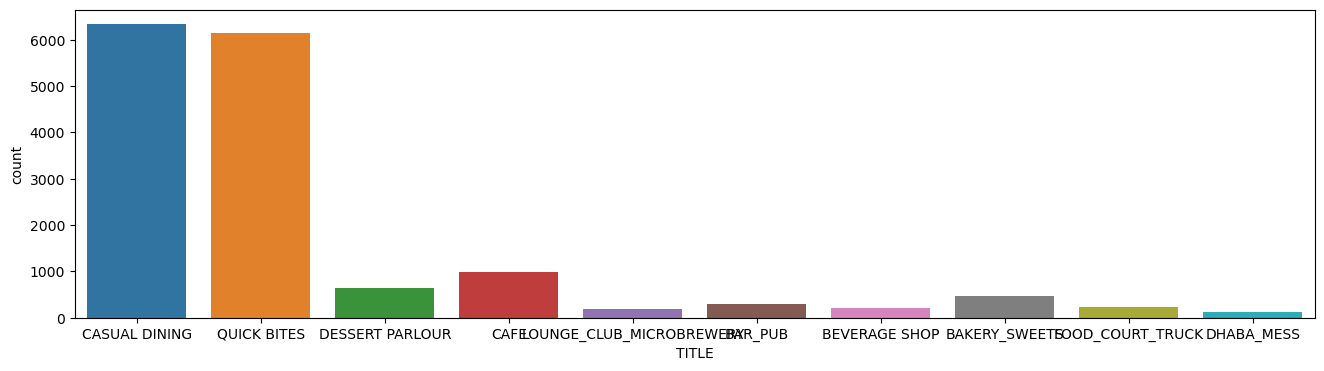

In [204]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.countplot(data=df_cleaned, x='TITLE', ax=ax)
plt.show()

In [205]:
df_cleaned.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [208]:
df_cleaned.TITLE.isna().sum()

0

In [210]:
df_cleaned.TITLE.replace('None',np.nan,inplace=True)

In [212]:
df_cleaned.TITLE.isna().sum()

0

In [214]:
df_cleaned[df_cleaned.TITLE.isna()] 

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST


In [216]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [218]:
df.CUISINES.value_counts()

CUISINES
North Indian                       716
North Indian, Chinese              714
South Indian                       706
Fast Food                          364
Chinese                            226
                                  ... 
Italian, Continental, Salad          1
Chinese, Arabian, North Indian       1
Italian, Mexican, Salad              1
South Indian, Chinese, Desserts      1
Sindhi, Street Food                  1
Name: count, Length: 5183, dtype: int64

In [220]:
show_all_rows(df.CUISINES.value_counts())

CUISINES
North Indian                                                                      716
North Indian, Chinese                                                             714
South Indian                                                                      706
Fast Food                                                                         364
Chinese                                                                           226
Bakery, Desserts                                                                  190
Bakery                                                                            187
South Indian, North Indian, Chinese                                               183
Cafe                                                                              181
Kerala                                                                            178
Biryani                                                                           164
Street Food                                  

In [221]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_cuisine = tfidf_vectorizer.fit_transform(df_cleaned['CUISINES'])
feature_names = tfidf_vectorizer.get_feature_names_out()
df_cuisine = pd.DataFrame(data=df_cuisine.toarray(), columns=feature_names)

In [224]:
df_cleaned[df_cleaned.CUISINES.str.contains('North Indian')].CUISINES

0                       Malwani, Goan, North Indian
2        North Indian, Chinese, Biryani, Hyderabadi
5           North Indian, Chinese, Seafood, Biryani
6        Cafe, Chinese, Pizza, North Indian, Burger
8                        South Indian, North Indian
                            ...                    
16911                North Indian, Mughlai, Chinese
16912          North Indian, Chinese, Kebab, Juices
16915                North Indian, Mughlai, Chinese
16916                North Indian, Mughlai, Chinese
16918                     Continental, North Indian
Name: CUISINES, Length: 6656, dtype: object

In [226]:
df_cleaned['n_indian_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('North Indian'),1)
df_cleaned['n_indian_cuisine'] = df_cleaned['n_indian_cuisine'].mask(~df_cleaned.CUISINES.str.contains('North Indian'),0)

In [228]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,1
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,1
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0
...,...,...,...,...,...,...,...,...,...,...
16915,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes,NaN,1
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,1
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0


In [230]:
df_cleaned[df_cleaned.CUISINES.str.contains('South Indian')].CUISINES

8                               South Indian, North Indian
13                                            South Indian
30                              South Indian, North Indian
33                     South Indian, North Indian, Chinese
40                     North Indian, South Indian, Chinese
                               ...                        
16897                  South Indian, North Indian, Chinese
16903                  North Indian, South Indian, Chinese
16904                Fast Food, North Indian, South Indian
16910    South Indian, North Indian, Fast Food, Chinese...
16914                                 Kerala, South Indian
Name: CUISINES, Length: 2904, dtype: object

In [232]:
df_cleaned['s_indian_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('South Indian'),1)
df_cleaned['s_indian_cuisine'] = df_cleaned['s_indian_cuisine'].mask(~df_cleaned.CUISINES.str.contains('South Indian'),0)

In [234]:
df_cleaned.s_indian_cuisine.value_counts()

s_indian_cuisine
0    12729
1     2904
Name: count, dtype: int64

In [236]:
df_cleaned[df_cleaned.CUISINES.str.contains('Chinese')].CUISINES

2               North Indian, Chinese, Biryani, Hyderabadi
3                                         Tibetan, Chinese
5                  North Indian, Chinese, Seafood, Biryani
6               Cafe, Chinese, Pizza, North Indian, Burger
10               North Indian, Chinese, Fast Food, Biryani
                               ...                        
16910    South Indian, North Indian, Fast Food, Chinese...
16911                       North Indian, Mughlai, Chinese
16912                 North Indian, Chinese, Kebab, Juices
16915                       North Indian, Mughlai, Chinese
16916                       North Indian, Mughlai, Chinese
Name: CUISINES, Length: 5464, dtype: object

In [238]:
df_cleaned['chinese_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Chinese'),1)
df_cleaned['chinese_cuisine'] = df_cleaned['chinese_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Chinese'),0)

In [240]:
df_cleaned.chinese_cuisine.value_counts()

chinese_cuisine
0    10169
1     5464
Name: count, dtype: int64

In [242]:
df_cleaned[df_cleaned.CUISINES.str.contains('Desserts|Ice Cream|Bakery')].CUISINES

4                           Desserts
19          Bakery, Fast Food, Momos
49               Ice Cream, Desserts
64               Beverages, Desserts
75                  Desserts, Mithai
                    ...             
16887    Bakery, Fast Food, Desserts
16894                         Bakery
16895               Bakery, Desserts
16901     Fast Food, Bakery, Chinese
16905            Ice Cream, Desserts
Name: CUISINES, Length: 2005, dtype: object

In [244]:
df_cleaned['bakery_desserts_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),1)
df_cleaned['bakery_desserts_cuisine'] = df_cleaned['bakery_desserts_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),0)

In [246]:
df_cleaned.bakery_desserts_cuisine.value_counts()

bakery_desserts_cuisine
0    13628
1     2005
Name: count, dtype: int64

In [248]:
df_cleaned[df_cleaned.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo')].CUISINES

6               Cafe, Chinese, Pizza, North Indian, Burger
10               North Indian, Chinese, Fast Food, Biryani
11                            Fast Food, Burger, Beverages
16                                 North Indian, Fast Food
19                                Bakery, Fast Food, Momos
                               ...                        
16901                           Fast Food, Bakery, Chinese
16904                Fast Food, North Indian, South Indian
16910    South Indian, North Indian, Fast Food, Chinese...
16913                                  Sindhi, Street Food
16919                                     Rolls, Beverages
Name: CUISINES, Length: 4673, dtype: object

In [250]:
df_cleaned['fast_food_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),1)
df_cleaned['fast_food_cuisine'] = df_cleaned['fast_food_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),0)

In [252]:
df_cleaned.fast_food_cuisine.value_counts()

fast_food_cuisine
0    10960
1     4673
Name: count, dtype: int64

In [254]:
indian_states = 'Andhra Pradesh,Arunachal Pradesh ,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar Islands,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Lakshadweep,National Capital Territory of Delhi,Puducherry'.replace(',','|')

In [256]:
indian_states

'Andhra Pradesh|Arunachal Pradesh |Assam|Bihar|Chhattisgarh|Goa|Gujarat|Haryana|Himachal Pradesh|Jammu and Kashmir|Jharkhand|Karnataka|Kerala|Madhya Pradesh|Maharashtra|Manipur|Meghalaya|Mizoram|Nagaland|Odisha|Punjab|Rajasthan|Sikkim|Tamil Nadu|Telangana|Tripura|Uttar Pradesh|Uttarakhand|West Bengal|Andaman and Nicobar Islands|Chandigarh|Dadra and Nagar Haveli|Daman and Diu|Lakshadweep|National Capital Territory of Delhi|Puducherry'

In [258]:
df_cleaned[df_cleaned.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states))].CUISINES

0                              Malwani, Goan, North Indian
2               North Indian, Chinese, Biryani, Hyderabadi
5                  North Indian, Chinese, Seafood, Biryani
10               North Indian, Chinese, Fast Food, Biryani
14                                           Maharashtrian
                               ...                        
16855                      Goan, Seafood, Konkan, Desserts
16862                        North Indian, Chinese, Kerala
16881                                               Kerala
16899    Biryani, Chinese, Mughlai, North Indian, Hyder...
16914                                 Kerala, South Indian
Name: CUISINES, Length: 1612, dtype: object

In [260]:
df_cleaned['regional_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)),1)
df_cleaned['regional_cuisine'] = df_cleaned['regional_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)),0)

In [262]:
df_cleaned.regional_cuisine.value_counts()

regional_cuisine
0    14021
1     1612
Name: count, dtype: int64

In [264]:
df_cleaned[df_cleaned.CUISINES.str.contains('Beverage|Cafe|Juices')].CUISINES

6               Cafe, Chinese, Pizza, North Indian, Burger
11                            Fast Food, Burger, Beverages
24                                  Cafe, Italian, Chinese
31                                               Cafe, Tea
32       Cafe, Continental, European, American, Healthy...
                               ...                        
16877                                                 Cafe
16878                                      Cafe, Fast Food
16910    South Indian, North Indian, Fast Food, Chinese...
16912                 North Indian, Chinese, Kebab, Juices
16919                                     Rolls, Beverages
Name: CUISINES, Length: 2323, dtype: object

In [266]:
df_cleaned['beverage_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Beverage|Cafe|Juices'),1)
df_cleaned['beverage_cuisine'] = df_cleaned['beverage_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Beverage|Cafe|Juices'),0)

In [268]:
df_cleaned[df_cleaned.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese')].CUISINES

1                 Asian, Modern Indian, Japanese
5        North Indian, Chinese, Seafood, Biryani
12                              Arabian, Mughlai
20                         Continental, European
24                        Cafe, Italian, Chinese
                          ...                   
16888                                Continental
16896        European, Continental, North Indian
16906             Chinese, North Indian, Arabian
16907    European, Mediterranean, Italian, Sushi
16918                  Continental, North Indian
Name: CUISINES, Length: 4398, dtype: object

In [270]:
df_cleaned['non_indian_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),1)
df_cleaned['non_indian_cuisine'] = df_cleaned['non_indian_cuisine'].mask(~df_cleaned.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),0)

In [272]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes,NaN,1,0,1,0,0,0,0,0
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1,0,1,0,0,0,0,0
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,1,0,0,0,0,0,0,1
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0,0,0,0,1,0,1,0


In [274]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes,NaN,1,0,1,0,0,0,0,0
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1,0,1,0,0,0,0,0
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,1,0,0,0,0,0,0,1
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0,0,0,0,1,0,1,0


In [276]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [278]:
df_cleaned.TIME.value_counts()

TIME
11am – 11pm (Mon-Sun)                                    1753
12noon – 12midnight (Mon-Sun)                             584
12noon – 11pm (Mon-Sun)                                   512
11am – 12midnight (Mon-Sun)                               401
10am – 10pm (Mon-Sun)                                     266
                                                         ... 
5:30am – 12:30AM (Mon-Sun)                                  1
10am – 10pm (Mon, Tue, Wed, Sun), 10am – 11pm...            1
11:30am – 4:20pm, 6:30pm – 11pm (Mon-Sun)                   1
12noon – 12midnight (Mon-Sat),9am – 12midnight...           1
11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun), 3pm...       1
Name: count, Length: 3054, dtype: int64

In [280]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes,NaN,1,0,1,0,0,0,0,0
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1,0,1,0,0,0,0,0
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,1,0,0,0,0,0,0,1
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0,0,0,0,1,0,1,0


In [282]:
df_cleaned[df_cleaned.TIME.str.contains('Closed')].TIME

14                      Closed (Mon),11am – 11pm (Tue-Sun)
19                       Closed (Mon),9am – 10pm (Tue-Sun)
27         Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)
31       8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)
85                 Closed (Mon),7:30am – 10:30pm (Tue-Sun)
                               ...                        
16749                     9am – 9pm (Mon-Sat),Closed (Sun)
16783               Closed (Mon),8:30am – 8:30pm (Tue-Sun)
16840                 Closed (Mon),6:30pm – 11pm (Tue-Sun)
16887                10:30am – 11pm (Mon-Sat),Closed (Sun)
16902                Closed (Mon),10am – 11:45pm (Tue-Sun)
Name: TIME, Length: 478, dtype: object

In [284]:
df_cleaned[df_cleaned.TIME.str.contains(r"Closed (.*?)\)")].TIME

14                      Closed (Mon),11am – 11pm (Tue-Sun)
19                       Closed (Mon),9am – 10pm (Tue-Sun)
27         Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)
31       8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)
85                 Closed (Mon),7:30am – 10:30pm (Tue-Sun)
                               ...                        
16749                     9am – 9pm (Mon-Sat),Closed (Sun)
16783               Closed (Mon),8:30am – 8:30pm (Tue-Sun)
16840                 Closed (Mon),6:30pm – 11pm (Tue-Sun)
16887                10:30am – 11pm (Mon-Sat),Closed (Sun)
16902                Closed (Mon),10am – 11:45pm (Tue-Sun)
Name: TIME, Length: 411, dtype: object

In [286]:
closed_days_list = []
for i,pat in enumerate(df_cleaned.TIME):
                print(i)
                print(pat)
                try:
                    temp = re.findall(pattern=r"Closed (.*?)\)",string=pat)
                    temp = re.sub(pattern='\(',repl='',string=temp[0])
                    closed_days_list.append(temp)

                except:
                    closed_days_list.append('Never Closed')
                print(temp)

0
11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)
[]
1
6pm – 11pm (Mon-Sun)
[]
2
11am – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
3
11:30am – 1am (Mon-Sun)
[]
4
11am – 1am (Mon-Sun)
[]
5
12noon – 12:30AM (Mon-Sun)
[]
6
12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun)...
[]
7
1pm – 1am (Mon-Sun)
[]
8
7am – 10:30pm (Mon-Sun)
[]
9
11am – 2pm, 4pm – 10:30pm (Mon-Sun)
[]
10
12:30pm – 12:30AM (Mon-Sun)
[]
11
11am – 12:15AM (Mon, Tue, Wed, Thu, Fri, Sun)...
[]
12
11am – 11pm (Mon-Sun)
[]
13
11am – 11:30pm (Mon-Sun)
[]
14
Closed (Mon),11am – 11pm (Tue-Sun)
Mon
15
11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...
[]
16
7:30am – 12midnight (Mon-Sun)
[]
17
11am – 12midnight (Mon-Sun)
[]
18
11am – 11:45pm (Mon-Sun)
[]
19
Closed (Mon),9am – 10pm (Tue-Sun)
Mon
20
9:30am – 10pm (Mon-Sun)
[]
21
10:30am – 11:30pm (Mon-Sun)
[]
22
11am – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
23
11am – 11pm (Mon-Sun)
[]
24
12noon – 11pm (Mon-Sun)
[]
25
12:30pm – 11pm (Mon-Thu),12:30pm – 11:30pm...
[]
26
Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)

In [287]:
len(closed_days_list)

15633

In [288]:
df_cleaned['CLOSED'] = closed_days_list

In [289]:
df_cleaned[df_cleaned.CLOSED != 'Never Closed']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine,CLOSED
14,QUICK BITES,15024,Maharashtrian,"Closed (Mon),11am – 11pm (Tue-Sun)",Thane West,Majiwada,4.0,160 votes,300.0,0,0,0,0,0,1,0,0,Mon
19,QUICK BITES,11841,"Bakery, Fast Food, Momos","Closed (Mon),9am – 10pm (Tue-Sun)",New Delhi,Krishna Nagar,4.1,350 votes,200.0,0,0,0,1,1,0,0,0,Mon
27,CASUAL DINING,10277,Italian,"Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)",Chennai,Vadapalani,4.1,178 votes,1400.0,0,0,0,0,0,0,0,1,Mon
31,CAFE,2802,"Cafe, Tea","8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)",Gurgaon,DLF Cyber City,4.0,546 votes,500.0,0,0,0,0,0,0,1,0,Sun
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300.0,1,1,0,0,0,0,0,0,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16749,QUICK BITES,6349,Fast Food,"9am – 9pm (Mon-Sat),Closed (Sun)",Mumbai,Dadar West,3.9,86 votes,NaN,0,0,0,0,1,0,0,0,Sun
16783,CAFE,13883,"Cafe, American","Closed (Mon),8:30am – 8:30pm (Tue-Sun)",Hyderabad,Jubilee Hills,4.2,706 votes,NaN,0,0,0,0,0,0,1,1,Mon
16840,CASUAL DINING,4632,"Chinese, Japanese","Closed (Mon),6:30pm – 11pm (Tue-Sun)",Chennai,Velachery,4.2,128 votes,NaN,0,0,1,0,0,0,0,1,Mon
16887,QUICK BITES,1027,"Bakery, Fast Food, Desserts","10:30am – 11pm (Mon-Sat),Closed (Sun)",Mumbai,Lower Parel,3.7,96 votes,NaN,0,0,0,1,1,0,0,0,Sun


In [290]:
df_cleaned[df_cleaned.CLOSED == 'Mon, Tue, Thu, Sun']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine,CLOSED
5108,LOUNGE_CLUB_MICROBREWERY,15322,Finger Food,"Closed (Mon, Tue, Thu, Sun), 7pm – 3am (Wed, F...",Mumbai,Lower Parel,4.0,526 votes,5000.0,0,0,0,0,1,0,0,0,"Mon, Tue, Thu, Sun"


In [291]:
df_cleaned[df_cleaned.CLOSED == 'Mon, Tue, Wed, Thu, Fri, Sun']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine,CLOSED
14860,CASUAL DINING,14792,North Indian,"Closed (Mon, Tue, Wed, Thu, Fri, Sun), 10pm – ...",Kochi,Willingdon Island,-,NaN,NaN,1,0,0,0,0,0,0,0,"Mon, Tue, Wed, Thu, Fri, Sun"


In [293]:
df_cleaned.CLOSED.value_counts()

CLOSED
Never Closed                    15222
Mon                               257
Sun                               107
Mon, Tue, Wed, Thu, Sun             7
Mon-Tue                             6
Sat-Sun                             5
Tue                                 4
Mon, Sat                            3
Mon, Tue, Sun                       3
Mon-Thu                             3
Mon, Sun                            2
Mon, Thu                            2
Wed                                 2
Mon, Tue, Thu                       1
Thu-Sun                             1
Mon, Wed, Thu, Sat                  1
Mon, Tue, Thu, Sun                  1
Mon, Fri                            1
Wed-Sun                             1
Sat                                 1
Mon, Wed, Thu, Sun                  1
Mon, Tue, Thu, Fri, Sat, Sun        1
Mon, Tue, Wed, Thu, Fri, Sun        1
Name: count, dtype: int64

In [298]:
days_of_week_list = 'Mon,Tue,Wed,Thu,Fri,Sat,Sun'.split(',')

In [302]:
days_of_week_dict = dict(zip(days_of_week_list,np.arange(7)))

In [304]:
days_of_week_list

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [305]:
days_of_week_dict

{'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

In [306]:
temp = 'Mon'

In [310]:
'Mon' in days_of_week_list

True

In [312]:
days_of_week_dict.keys()

dict_keys(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [314]:
days_of_week_dict['Mon']

0

In [316]:
days_of_week_dict['Thu']

3

In [318]:
final = []
temp_counter = df_cleaned[df_cleaned.CLOSED.str.contains('-')].CLOSED.value_counts().index
print(temp_counter)
for dash in temp_counter:
    pattern = dash
    print('###################################')
    print('Pattern',dash)
    i = pattern.split('-')[0]
    j = pattern.split('-')[1]
    i = days_of_week_dict[i]
    j = days_of_week_dict[j]
    
    print(i,j)
    revised_closed_days = []


    if i < j:

        while i <= j:
            temp_x = [k for k,v in days_of_week_dict.items() if v == i]
            temp_x =''.join(map(str,temp_x))
            revised_closed_days.append(temp_x)
            i += 1

    else : 
        while i >= j:
            temp_x = [k for k,v in days_of_week_dict.items() if v == i]
            temp_x =''.join(map(str,temp_x))
            revised_closed_days.append(temp_x)
            i -= 1
    
    revised_closed_days = ', '.join(map(str,revised_closed_days))
    print(revised_closed_days)
    dash_closed = df_cleaned[df_cleaned.CLOSED.str.contains(dash)].CLOSED.value_counts().index
    print(dash_closed)

    df_cleaned.CLOSED.replace(to_replace=dash_closed,value=revised_closed_days,inplace=True)
    
    final.append(revised_closed_days)

Index(['Mon-Tue', 'Sat-Sun', 'Mon-Thu', 'Wed-Sun', 'Thu-Sun'], dtype='object', name='CLOSED')
###################################
Pattern Mon-Tue
0 1
Mon, Tue
Index(['Mon-Tue'], dtype='object', name='CLOSED')
###################################
Pattern Sat-Sun
5 6
Sat, Sun
Index(['Sat-Sun'], dtype='object', name='CLOSED')
###################################
Pattern Mon-Thu
0 3
Mon, Tue, Wed, Thu
Index(['Mon-Thu'], dtype='object', name='CLOSED')
###################################
Pattern Wed-Sun
2 6
Wed, Thu, Fri, Sat, Sun
Index(['Wed-Sun'], dtype='object', name='CLOSED')
###################################
Pattern Thu-Sun
3 6
Thu, Fri, Sat, Sun
Index(['Thu-Sun'], dtype='object', name='CLOSED')


In [320]:
df_cleaned.CLOSED.value_counts()

CLOSED
Never Closed                    15222
Mon                               257
Sun                               107
Mon, Tue, Wed, Thu, Sun             7
Mon, Tue                            6
Sat, Sun                            5
Tue                                 4
Mon, Sat                            3
Mon, Tue, Sun                       3
Mon, Tue, Wed, Thu                  3
Mon, Sun                            2
Mon, Thu                            2
Wed                                 2
Mon, Tue, Thu                       1
Thu, Fri, Sat, Sun                  1
Mon, Wed, Thu, Sat                  1
Mon, Tue, Thu, Sun                  1
Mon, Fri                            1
Wed, Thu, Fri, Sat, Sun             1
Sat                                 1
Mon, Wed, Thu, Sun                  1
Mon, Tue, Thu, Fri, Sat, Sun        1
Mon, Tue, Wed, Thu, Fri, Sun        1
Name: count, dtype: int64

In [322]:
df_cleaned.CLOSED.replace('Never Closed','Never_closed',inplace=True)

In [324]:
df_cleaned.CLOSED.value_counts()

CLOSED
Never_closed                    15222
Mon                               257
Sun                               107
Mon, Tue, Wed, Thu, Sun             7
Mon, Tue                            6
Sat, Sun                            5
Tue                                 4
Mon, Sat                            3
Mon, Tue, Sun                       3
Mon, Tue, Wed, Thu                  3
Mon, Sun                            2
Mon, Thu                            2
Wed                                 2
Mon, Tue, Thu                       1
Thu, Fri, Sat, Sun                  1
Mon, Wed, Thu, Sat                  1
Mon, Tue, Thu, Sun                  1
Mon, Fri                            1
Wed, Thu, Fri, Sat, Sun             1
Sat                                 1
Mon, Wed, Thu, Sun                  1
Mon, Tue, Thu, Fri, Sat, Sun        1
Mon, Tue, Wed, Thu, Fri, Sun        1
Name: count, dtype: int64

In [326]:
df_temp = df_cleaned.copy()

In [328]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_closed = tfidf_vectorizer.fit_transform(df_temp['CLOSED'])
feature_names = tfidf_vectorizer.get_feature_names_out()
df_closed = pd.DataFrame(data=df_closed.toarray(), columns=feature_names)

In [330]:
df_closed

,fri,mon,never_closed,sat,sun,thu,tue,wed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
15628,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15631,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [332]:
df_cleaned = df_cleaned.join(df_closed)

In [334]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,...,non_indian_cuisine,CLOSED,fri,mon,never_closed,sat,sun,thu,tue,wed
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,0,...,1,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes,NaN,1,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,1,...,1,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
show_all_rows(df_cleaned.CITY.value_counts().index[:15])

Index(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Kochi', 'New Delhi',
       'Gurgaon', 'Secunderabad', 'Noida', 'Navi Mumbai', 'Ghaziabad', 'Thane',
       'Faridabad', 'Bandra West', 'Thane West'],
      dtype='object', name='CITY')


In [338]:
show_all_rows(df_cleaned.CITY.value_counts())

CITY
Chennai                                                                           2707
Bangalore                                                                         2656
Hyderabad                                                                         2366
Mumbai                                                                            2173
Kochi                                                                             1721
New Delhi                                                                         1427
Gurgaon                                                                            431
Secunderabad                                                                       392
Noida                                                                              217
Navi Mumbai                                                                        216
Ghaziabad                                                                          117
Thane                                 

In [340]:
top10_cities = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi',
       'Gurgaon', 'Noida', 'Ghaziabad', 'Thane']

In [342]:
df_cleaned.isna().sum()

TITLE                         0
RESTAURANT_ID                 0
CUISINES                      0
TIME                          0
CITY                         48
LOCALITY                     28
RATING                        3
VOTES                      1442
COST                       3947
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
CLOSED                        0
fri                        1206
mon                        1206
never_closed               1206
sat                        1206
sun                        1206
thu                        1206
tue                        1206
wed                        1206
dtype: int64

In [344]:
df_cleaned.CITY.isna().sum()

48

In [346]:
df_cleaned.dropna()[df_cleaned.dropna().CITY.str.contains('Mumbai')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,...,non_indian_cuisine,CLOSED,fri,mon,never_closed,sat,sun,thu,tue,wed
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800.0,1,...,1,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16,CASUAL DINING,5254,"North Indian, Fast Food",7:30am – 12midnight (Mon-Sun),Mumbai,Borivali West,3.6,319 votes,900.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
64,DESSERT PARLOUR,8750,"Beverages, Desserts",12noon – 12:30AM (Mon-Sun),Mumbai,Mazgaon,3.7,69 votes,300.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,CASUAL DINING,15000,"Mediterranean, European, Mughlai, Finger Food","4pm – 1am (Mon-Sat),12noon – 1am (Sun)",Mumbai,Lower Parel,4.2,2132 votes,2000.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12663,CASUAL DINING,2334,"North Indian, Chinese, Beverages",12noon – 12midnight (Mon-Sun),Mumbai,Chembur,3.6,133 votes,600.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12666,QUICK BITES,11730,"Mughlai, North Indian, Kebab",7:30am – 12:30AM (Mon-Sun),Mumbai,Byculla,4.0,702 votes,350.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800.0,0,...,1,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [348]:
df_temp = df_cleaned.copy()

In [350]:
for city in top10_cities:
    print(city)
    temp_city = df_cleaned[df_cleaned.CITY.str.contains(city,na=False)].CITY.value_counts().index
    print(temp_city)
    # mapper
    df_cleaned.CITY.replace(to_replace=temp_city,value=city,inplace=True)

Chennai
Index(['Chennai', 'Chennai.', 'Chennai Teynampet', 'Chennai Mahabalipuram',
       'Chennai Padur', 'Chennai Kovalam', 'Chennai Injambakkam',
       'T-Nagar Chennai', 'Balavinayagar Nagar Chennai', 'Chennai-600008',
       'Chennai Velachery', 'Chennai 600040', 'Chennai 40', 'Chennai 37',
       'Chennai (Above Bombay Brasserie)', 'Sholinganallur. Chennai',
       'Chennai. (Near Hotel Matshya)',
       'Chennai - 34 Landmark - Near Loyola College', 'Chennai Chrompet',
       'Chennai 600034.', 'Chennai Opposite 5C Bus stand',
       'Chennai (Bang Opposite Indian Bank)', 'Chennai - 600040',
       'ECR NEELANKARAI Chennai 600115', 'Chennai- 600107',
       'Chennai Thousand Lights', 'Chennai Thuraipakkam', 'Chennai Perungudi',
       'Chennai opp: Vasanth & co', 'Chennai - 600018'],
      dtype='object', name='CITY')
Bangalore
Index(['Bangalore', 'Bangalore.', 'Bangalore-560066',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Whitefield Bangal

In [352]:
show_all_rows(df_cleaned.CITY.value_counts())

CITY
Chennai                                                                 2744
Bangalore                                                               2673
Mumbai                                                                  2415
Hyderabad                                                               2384
Kochi                                                                   1743
New Delhi                                                               1437
Gurgaon                                                                  433
Secunderabad                                                             392
Noida                                                                    256
Thane                                                                    182
Ghaziabad                                                                118
Faridabad                                                                 98
Bandra West                                                            

In [354]:
top10_cities

'Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane'

'Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane'

In [356]:
other_cities = df_cleaned[~df_cleaned.CITY.str.contains('Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane',na=False)].CITY.value_counts().index

In [358]:
df_cleaned.CITY.replace(to_replace=other_cities,value='Others',inplace=True)

In [360]:
df_cleaned.CITY.value_counts()

CITY
Chennai      2744
Bangalore    2673
Mumbai       2415
Hyderabad    2384
Kochi        1743
New Delhi    1437
Others       1200
Gurgaon       433
Noida         256
Thane         182
Ghaziabad     118
Name: count, dtype: int64

In [362]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,...,non_indian_cuisine,CLOSED,fri,mon,never_closed,sat,sun,thu,tue,wed
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,0,...,1,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes,NaN,1,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Others,Sector 86,3.7,53 votes,NaN,1,...,1,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [364]:
df_cleaned.LOCALITY.value_counts()

LOCALITY
Gachibowli                               192
Indiranagar                              174
Kakkanad                                 171
Kukatpally                               163
Madhapur                                 155
                                        ... 
Sector 82                                  1
Opposite Indian Oil Petrol Pump Uppal      1
Near Christ College                        1
I C Colony                                 1
Perry Cross Road                           1
Name: count, Length: 1534, dtype: int64

In [366]:
df_cleaned.VOTES

0         49 votes
1         30 votes
2        221 votes
3         24 votes
4        165 votes
           ...    
16915    197 votes
16916    287 votes
16918     53 votes
16919          NaN
16920     63 votes
Name: VOTES, Length: 15633, dtype: object

In [368]:
df_cleaned.VOTES = df_cleaned.dropna().VOTES.apply(lambda x : float(x[:2]))

In [370]:
df_cleaned.VOTES

0        49.0
1        30.0
2        22.0
3        24.0
4        16.0
         ... 
16915     NaN
16916     NaN
16918     NaN
16919     NaN
16920     NaN
Name: VOTES, Length: 15633, dtype: float64

In [372]:
df_cleaned.iloc[:,:10]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,1
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,22.0,800.0,1
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,16.0,300.0,0
...,...,...,...,...,...,...,...,...,...,...
16915,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,NaN,NaN,1
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,NaN,NaN,1
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Others,Sector 86,3.7,NaN,NaN,1
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0


In [374]:
df_cleaned.RATING.value_counts()

RATING
3.9    1501
3.8    1493
4.0    1391
3.7    1329
3.6    1161
4.1    1139
3.5     909
4.2     902
NEW     782
3.4     720
4.3     694
-       657
4.4     454
3.3     450
3.2     327
3.1     252
4.5     250
2.9     225
3.0     211
2.8     182
4.6     159
2.7     120
2.6      80
4.7      78
2.5      47
4.8      43
4.9      27
2.4      23
2.3      14
2.1       4
2.2       4
2.0       2
Name: count, dtype: int64

In [376]:
df_cleaned[df_cleaned.RATING == 'NEW']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,...,non_indian_cuisine,CLOSED,fri,mon,never_closed,sat,sun,thu,tue,wed
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,NaN,200.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,NaN,800.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
117,QUICK BITES,8091,"North Indian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,NEW,NaN,500.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
120,QUICK BITES,4993,"North Indian, South Indian","7:30am – 9:30pm (Mon-Sat),Closed (Sun)",Bangalore,Whitefield,NEW,NaN,150.0,1,...,0,Sun,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
165,QUICK BITES,10292,"American, Fast Food",11am – 11pm (Mon-Sun),Mumbai,Malad West,NEW,NaN,300.0,0,...,1,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16871,CASUAL DINING,681,"American, Italian",7pm – 1am (Mon-Sun),Mumbai,Fort,NEW,NaN,NaN,0,...,1,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16873,CAFE,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,NaN,NaN,1,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16875,QUICK BITES,6387,Fast Food,12:30pm – 10:30pm (Mon-Sun),New Delhi,Shalimar Bagh,NEW,NaN,NaN,0,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16888,QUICK BITES,13381,Continental,11am – 12midnight (Mon-Sun),Bangalore,Indiranagar,NEW,NaN,NaN,0,...,1,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
df_cleaned.RATING.mask(df_cleaned.RATING == 'NEW',np.nan,inplace=True)

In [380]:
df_cleaned[df_cleaned.RATING == '-']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,...,non_indian_cuisine,CLOSED,fri,mon,never_closed,sat,sun,thu,tue,wed
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,NaN,400.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300.0,1,...,0,Mon,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
156,QUICK BITES,6302,South Indian,6am – 8pm (Mon-Sun),Kochi,Vyttila,-,NaN,400.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
178,CASUAL DINING,14064,"Indian, Chinese",12noon – 11:30pm (Mon-Sun),Kochi,Vennala,-,NaN,400.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
235,QUICK BITES,14990,Kerala,8am – 7pm (Mon-Sun),Kochi,Near Marine Drive,-,NaN,50.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16716,QUICK BITES,1278,"Chinese, South Indian",10am – 9pm (Mon-Sun),Kochi,Kaloor,-,NaN,NaN,0,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16720,CASUAL DINING,5915,"Kerala, Biryani",7am – 11pm (Mon-Sun),Kochi,Kacheripady,-,NaN,NaN,0,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16799,CASUAL DINING,3829,"Italian, Desserts, Continental",10am – 12midnight (Mon-Sun),Others,Near Express Garden,-,NaN,NaN,0,...,1,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16862,QUICK BITES,5365,"North Indian, Chinese, Kerala",9am – 11pm (Mon-Sun),Kochi,Palarivattom,-,NaN,NaN,1,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
df_cleaned.RATING.mask(df_cleaned.RATING == '-',np.nan,inplace=True)

In [384]:
df_cleaned.isna().sum()

TITLE                         0
RESTAURANT_ID                 0
CUISINES                      0
TIME                          0
CITY                         48
LOCALITY                     28
RATING                     1442
VOTES                      5041
COST                       3947
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
CLOSED                        0
fri                        1206
mon                        1206
never_closed               1206
sat                        1206
sun                        1206
thu                        1206
tue                        1206
wed                        1206
dtype: int64

In [386]:
df_cleaned.RATING = df_cleaned.RATING.astype('float')

In [388]:
fig = fig_of_size(16,4)

<Figure size 1600x400 with 0 Axes>

<Axes: xlabel='RATING', ylabel='Density'>

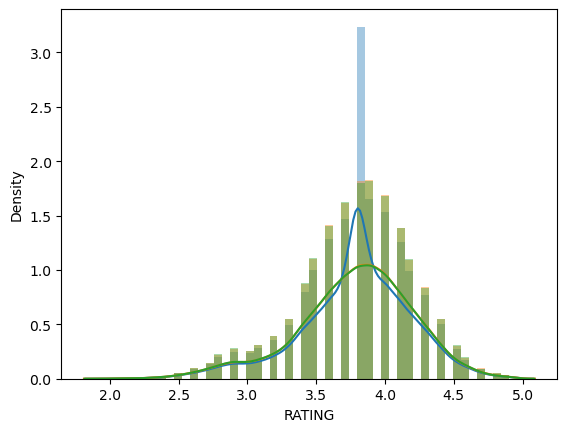

In [390]:
fig.add_subplot(131)
sns.distplot(MeanMedianImputer(variables=['RATING']).fit_transform(df_cleaned).RATING)
fig.add_subplot(132)
sns.distplot(df_cleaned.RATING)
fig.add_subplot(133)
sns.distplot(RandomSampleImputer(variables=['RATING']).fit_transform(df_cleaned).RATING)

In [391]:
df_cleaned = RandomSampleImputer(variables=['RATING']).fit_transform(df_cleaned)

In [392]:
df_cleaned.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,...,non_indian_cuisine,CLOSED,fri,mon,never_closed,sat,sun,thu,tue,wed
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,0,...,1,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,22.0,800.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,16.0,300.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [393]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,...,non_indian_cuisine,CLOSED,fri,mon,never_closed,sat,sun,thu,tue,wed
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,0,...,1,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,22.0,800.0,1,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,16.0,300.0,0,...,0,Never_closed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,NaN,NaN,1,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,NaN,NaN,1,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Others,Sector 86,3.7,NaN,NaN,1,...,1,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,4.0,NaN,NaN,0,...,0,Never_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [398]:
df_cleaned.isna().sum()

TITLE                         0
RESTAURANT_ID                 0
CUISINES                      0
TIME                          0
CITY                         48
LOCALITY                     28
RATING                        0
VOTES                      5041
COST                       3947
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
CLOSED                        0
fri                        1206
mon                        1206
never_closed               1206
sat                        1206
sun                        1206
thu                        1206
tue                        1206
wed                        1206
dtype: int64

In [400]:
df_cleaned.isna().mean()

TITLE                      0.000000
RESTAURANT_ID              0.000000
CUISINES                   0.000000
TIME                       0.000000
CITY                       0.003070
LOCALITY                   0.001791
RATING                     0.000000
VOTES                      0.322459
COST                       0.252479
n_indian_cuisine           0.000000
s_indian_cuisine           0.000000
chinese_cuisine            0.000000
bakery_desserts_cuisine    0.000000
fast_food_cuisine          0.000000
regional_cuisine           0.000000
beverage_cuisine           0.000000
non_indian_cuisine         0.000000
CLOSED                     0.000000
fri                        0.077145
mon                        0.077145
never_closed               0.077145
sat                        0.077145
sun                        0.077145
thu                        0.077145
tue                        0.077145
wed                        0.077145
dtype: float64

In [402]:
num_var = df_cleaned.select_dtypes(include=['number']).columns.tolist()
cat_var = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

In [404]:
num_var

['RESTAURANT_ID',
 'RATING',
 'VOTES',
 'COST',
 'fri',
 'mon',
 'never_closed',
 'sat',
 'sun',
 'thu',
 'tue',
 'wed']

In [406]:
cat_var

['TITLE',
 'CUISINES',
 'TIME',
 'CITY',
 'LOCALITY',
 'n_indian_cuisine',
 's_indian_cuisine',
 'chinese_cuisine',
 'bakery_desserts_cuisine',
 'fast_food_cuisine',
 'regional_cuisine',
 'beverage_cuisine',
 'non_indian_cuisine',
 'CLOSED']

In [408]:
cat_missing = ['TITLE', 'CITY']
imputer = CategoricalImputer(imputation_method='frequent', variables=cat_missing)
df_cleaned[cat_missing] = imputer.fit_transform(df_cleaned[cat_missing])

<Axes: xlabel='VOTES', ylabel='Density'>

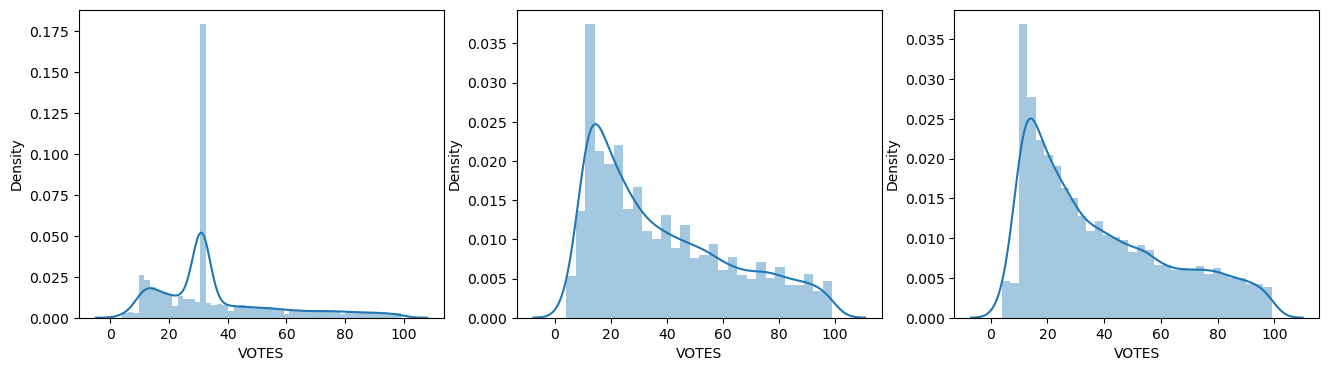

In [410]:
fig = fig_of_size(16,4)    
fig.add_subplot(131)
sns.distplot(MeanMedianImputer(variables=['VOTES']).fit_transform(df_cleaned).VOTES)
fig.add_subplot(132)
sns.distplot(df_cleaned.VOTES)
fig.add_subplot(133)
sns.distplot(RandomSampleImputer(variables=['VOTES']).fit_transform(df_cleaned).VOTES)

In [411]:
df_cleaned = RandomSampleImputer(variables=['VOTES']).fit_transform(df_cleaned)

In [412]:
df_cleaned.isna().sum()

TITLE                         0
RESTAURANT_ID                 0
CUISINES                      0
TIME                          0
CITY                          0
LOCALITY                     28
RATING                        0
VOTES                         0
COST                       3947
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
CLOSED                        0
fri                        1206
mon                        1206
never_closed               1206
sat                        1206
sun                        1206
thu                        1206
tue                        1206
wed                        1206
dtype: int64

In [413]:
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

In [414]:
df_cleaned = encoder.fit_transform(df_cleaned)

In [419]:
df_cleaned = pd.DataFrame(df_cleaned)

In [422]:
df_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,24267,24268,24269,24270,24271,24272,24273,24274,24275,24276
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [423]:
df_train = df_cleaned[~df_cleaned.isna()].copy()
df_test = df_cleaned[df_cleaned.isna()].copy()

In [424]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,24267,24268,24269,24270,24271,24272,24273,24274,24275,24276
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [425]:
len(df_train)

15633

In [426]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,24267,24268,24269,24270,24271,24272,24273,24274,24275,24276
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [428]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,24267,24268,24269,24270,24271,24272,24273,24274,24275,24276
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [429]:
X = df_train.drop(columns='COST')
y = df_train['COST']

KeyError: "['COST'] not found in axis"

In [ ]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    print('MSE:',mean_squared_error(y_val,y_preds))
    print('R2_Score',r2_score(y_val,y_preds))  

In [ ]:
train_n_ret_scores(LinearRegression())

In [ ]:
train_n_ret_scores(Ridge())

In [ ]:
train_n_ret_scores(Lasso(alpha=0.00003))

In [ ]:
train_n_ret_scores(ElasticNet(alpha=0.0001))

In [ ]:
train_n_ret_scores(SVR(kernel='linear'))

In [ ]:
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

In [ ]:
train_n_ret_scores(RandomForestRegressor())

In [ ]:
train_n_ret_scores(GradientBoostingRegressor())

In [ ]:
train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

In [ ]:
train_n_ret_scores(AdaBoostRegressor())

In [ ]:
models_df

In [ ]:
best_model = GradientBoostingRegressor()

In [ ]:
best_model.fit(X_train,y_train)

In [ ]:
best_model.score(X_val,y_val)

In [ ]:
test_prediction = best_model.predict(df_test)

In [ ]:
test_prediction

In [ ]:
best_model.score(df_test,test_prediction)

In [ ]:
X_train.shape

In [ ]:
df_test.shape

In [ ]:
pd.DataFrame(test_prediction).to_csv('Train_results.csv')

In [ ]:
joblib.dump(best_model,'Restaurant_Food_Price.pkl')